# **Milestone 1 Phase 1**

## **Introduction**

Nama: Luthfi Fadhlillah 
<br>
Batch: FTDS 009

---

### **Dataset Information**

Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan ('yes') atau ('No') berlangganan.

Tujuan klasifikasi adalah untuk memprediksi apakah klien akan berlangganan (ya/tidak) deposito berjangka (variabel y)


### **Atrribute Information**

* **age** (*numerik*)
* **job** : jenis pekerjaan (*kategori*: 'admin.', 'kerah biru', 'pengusaha', 'pembantu rumah tangga', 'manajemen', 'pensiun', 'wiraswasta', 'jasa ', 'mahasiswa', 'teknisi', 'menganggur', 'tidak diketahui')
* **marital** : status perkawinan (*kategoris*: 'cerai', 'menikah', 'lajang', 'tidak diketahui'; catatan: 'cerai' berarti cerai atau duda)
* **education** (*kategoris*: 'dasar.4th', 'bas.6y', 'basic.9y', 'high.school', 'buta huruf', 'professional.course', 'university.degree' , 'tidak dikenal')
* **default**: apakah kredit default? (*kategoris*: 'tidak', 'ya', 'tidak diketahui')
* **housing**: punya KPR? (*kategoris*: 'tidak', 'ya', 'tidak diketahui')
* **loan**: memiliki pinjaman pribadi? (*kategoris*: 'tidak', 'ya', 'tidak diketahui')

* **contact**: jenis komunikasi kontak (*kategori*: 'seluler', 'telepon')
* **month**: kontak terakhir bulan dalam setahun (*kategori*: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* **day_of_week**: hari kontak terakhir dalam seminggu (*kategoris*: 'mon', 'sel', 'wed', 'kamis', 'fri')
* **duration**: durasi kontak terakhir, dalam detik (*numerik*). Catatan penting: atribut ini sangat mempengaruhi target keluaran (misalnya, jika durasi=0 maka y='tidak'). Namun, durasinya tidak diketahui sebelum panggilan dilakukan. Juga, setelah akhir panggilan y jelas diketahui. Dengan demikian, input ini hanya boleh dimasukkan untuk tujuan benchmark dan harus dibuang jika tujuannya adalah untuk memiliki model prediksi yang realistis.
* **campaign**: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (*numerik*, termasuk kontak terakhir)
* **pdays**: jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (*numerik*; 999 berarti klien tidak dihubungi sebelumnya)
* **previous**: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (*numerik*)
* **poutcome**: hasil dari kampanye pemasaran sebelumnya (*kategorikal*: 'gagal', 'tidak ada', 'berhasil')

* **emp.var.rate**: indikator tingkat variasi pekerjaan triwulanan (*numerik*)
* **cons.price.idx**: indikator bulanan indeks harga konsumen (*numerik*)
* **cons.conf.idx**: indikator bulanan indeks kepercayaan konsumen (*numerik*)
* **euribor3m**: indikator harian tarif euribor 3 bulan (*numerik*)
* **nr.employed**: jumlah indikator triwulanan karyawan (*numerik*)

**Output variable**: 

apakah klien sudah berlangganan deposito berjangka? (*biner*: 'ya', 'tidak')





## Objective

Buat model untuk memprediksi apakah klien berlangganan deposito berjangka/term deposit.
Tujuan utama dapat dipecah menjadi 4:
1. Bandingkan kinerja antara masing-masing algoritma sebagai berikut:
     - Logistic Regression,
     - SVM (SVC),
     - Decision Tree,
     - Random Forest,
     - Adaboost,
     - KNN
     - Naive Bayes
2. Tentukan algoritma mana yang akan kita gunakan berdasarkan kinerja terbaik pada metrik yang dipilih.
3. Menganalisis bagian mana dari model yang perlu diperbaiki berdasarkan tahapan pemodelan secara keseluruhan.
4. Memprediksi input data baru pada model inference

# Import Library

In [182]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use("fivethirtyeight")
import seaborn as sns
import sklearn
sklearn.__version__
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn import tree
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Loading

Melakukan data loading dari dataset yang sudah disediakan

In [184]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Dataset Exploration

Check 5 baris teratas dan terbawah dari dataset

In [185]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [186]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [187]:
print(f"Rows, Cols: {df.shape[0], df.shape[1]}")
df.info()

Rows, Cols: (41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.co

- Dataset ini terdiri dari 41.188 baris dan 21 kolom. Di antara kolom, kita memiliki variabel target yang diberi nama 'y'.
- Dataset ini adalah campuran dari numerical dan categorical variabel.

In [188]:
num_cols = list(df.select_dtypes("number").columns)
print(num_cols)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


- Ini adalah deskripsi statistik dari numerical variable dalam dataset.

In [189]:
df.select_dtypes("number").describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


Kita dapat melihat bahwa ada beberapa variabel yang memiliki **skewed distribution** salah satunya yaitu `age` dan `duration`. Tapi kita tidak bisa memastikan apakah termasuk kedalam highly skewed atau tidak jika hanya dengan melihat data diatas, kita harus memeriksa distribution plot dan skewness value nya.

In [190]:
df.select_dtypes(object).describe().T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


Sebagian besar categorical variable memiliki nilai kardinalitas yang rendah (less unique value), kecuali job, education, dan month. Kardinalitas dari categorical variable perlu diperiksa karena kita tidak ingin model menghabiskan banyak waktu dalam menjalankan algoritma kompleksitas waktunya dipengaruhi oleh jumlah fitur. 

# Data Cleaning

## Missing Values

In [191]:
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

Dataset ini tidak memiliki missing values dari semua kolom.

## Duplicate Values

In [192]:
df.duplicated().any()

True

Dataset ini memiliki duplicate row didalamnya.

Data frame dibawah ini menunjukan duplicate rows.

In [193]:
df[df.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [194]:
print(f"Duplicated {len(df[df.duplicated()])} rows on idx: {list(df[df.duplicated()].index)}")
df[df.duplicated()]

Duplicated 12 rows on idx: [1266, 12261, 14234, 16956, 18465, 20216, 20534, 25217, 28477, 32516, 36951, 38281]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


Dari informasi di atas, kita tahu ada 12 duplicate rows dalam dataset

Bentuk df sebelum melakukan drop terhadap duplicate rows

In [195]:
print(f"Rows, Cols - Before: {df.shape[0], df.shape[1]}")

Rows, Cols - Before: (41188, 21)


Drop duplicate rows dan mempertahankan kemunculan pertama/nilai pertama. Juga, jangan lupa untuk mereset indeks karena mungkin ada beberapa kesalahan/peringatan pada tahap preprocessing berikutnya.

In [196]:
df = df.drop_duplicates(keep='first')
df.reset_index(drop = True, inplace = True)

Bentuk df setelah melakukan drop terhadap duplicate rows

In [197]:
print(f"Rows, Cols - After: {df.shape[0], df.shape[1]}")

Rows, Cols - After: (41176, 21)


## Rename/Replace Columns

In [198]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Replace kolom yang memiliki '.' dengan '_'.

In [199]:
df.columns = df.columns.str.replace('.', '_', regex = False)

Nama Kolom setelah di replace

In [200]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

# Data Exploration (EDA)

**Berapa persentase setiap nilai dalam variabel target(y)?**

<AxesSubplot:ylabel='y'>

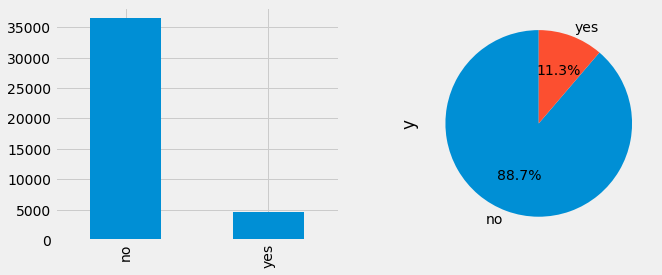

In [201]:
fig, axs = plt.subplots(ncols=2, figsize=(10,4))
df['y'].value_counts().plot(kind='bar', ax=axs[0])
df['y'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])

## Numerical Features

In [202]:
num_cols = list(df.select_dtypes("number").columns)
print("Num Features Length",len(num_cols), ":", num_cols)

Num Features Length 10 : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']


Kita memiliki 10 numerical features dalam datset.

In [203]:
num_cols_skewness = df[num_cols].skew()

Jika skeewness kurang dari -1 atau lebih besar dari 1, distribusinya highly skewed. Jika skewnessnya antara -1 dan -0,5 atau antara 0,5 dan 1, distribusinya moderately skewed. Jika skewness antara -0,5 dan 0,5, distribusinya simetris.

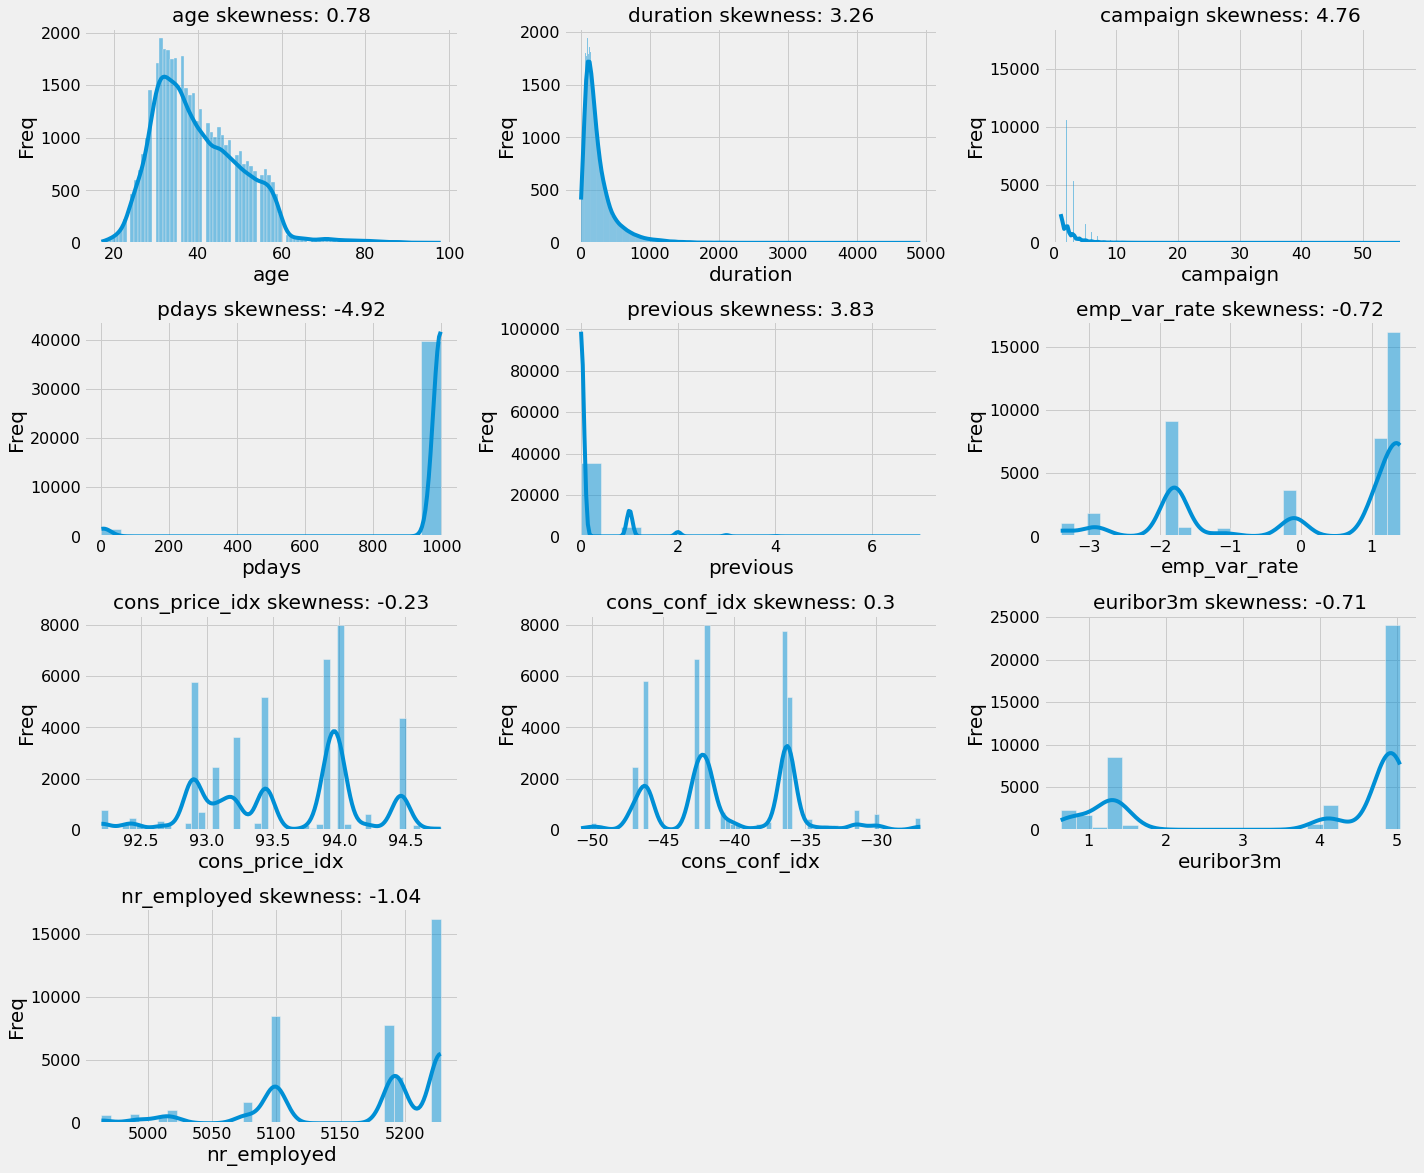

In [204]:
plt.figure(figsize=(20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2, 3, i+1)
    ax = sns.histplot(
        df[num_cols[i]],
        kde = True
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.tick_params(labelsize=16)
    ax.set_title(str(num_cols[i]) + ' skewness: ' + str(round(num_cols_skewness[i], 2)))
plt.tight_layout()
plt.show()

**Skewness:**
- cons_price_idx dan cons_conf_idx terdistribusi simetris.
- age, euribor3m, emp_var_rate dan nr_employed adalah moderately skewed.
- duration, campaign, previous, dan pdays adalah highly skewed.


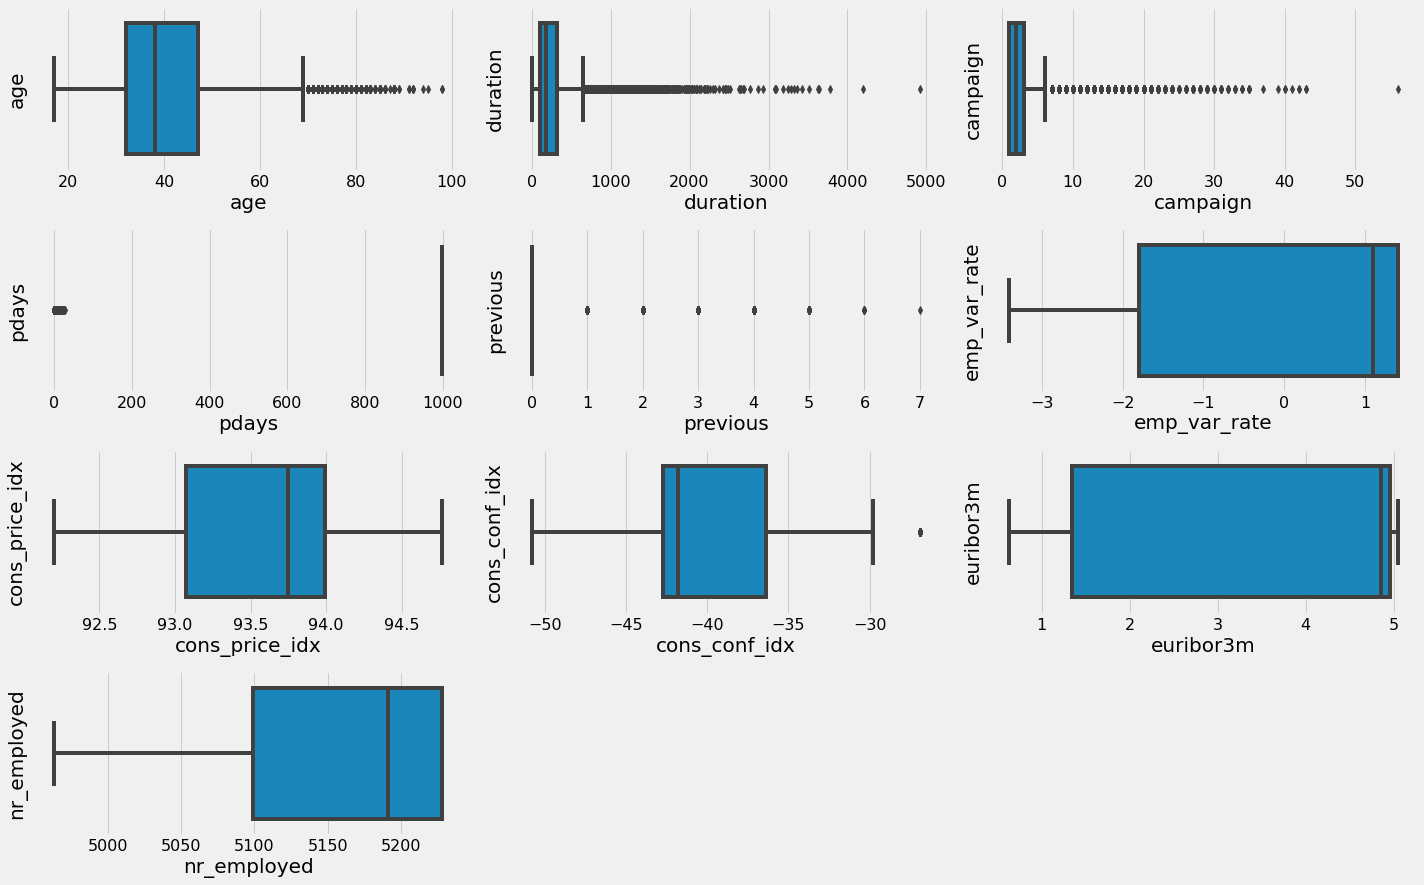

In [205]:
plt.figure(figsize=(20, 15))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2, 3, i+1)
    ax = sns.boxplot(
        x = df[num_cols[i]]
    )
    ax.set_xlabel(str(num_cols[i]), fontsize = 20)
    ax.set_ylabel(str(num_cols[i]), fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.show()

Fitur yang mengandung outlier:

Upper limits:
- age, duration, campaign, dan previous.

Bottom limits:
- pdays

**Kelompok usia dalam berlangganan deposito berjangka/term deposit**

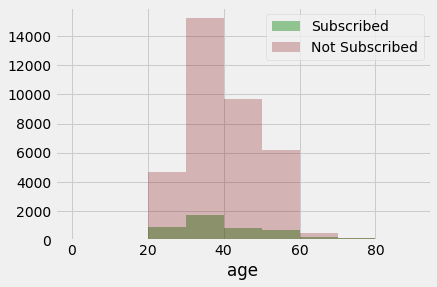

In [206]:
bins = range(0, 100, 10)
ax = sns.distplot(df.age[df.y == 'yes'], color = 'green', kde = False, bins = bins, label = 'Subscribed')
sns.distplot(df.age[df.y == 'no'], ax = ax, color = 'maroon', kde = False,hist_kws=dict(alpha=0.25), bins = bins, label = 'Not Subscribed')
plt.legend()
plt.show()

Berdasarkan kelompok usia, sebagian besar 30-an tahun cenderung berlangganan deposit daripada kelompok usia lainnya

**Apakah status pernikahan mempengaruhi langganan term deposit?**

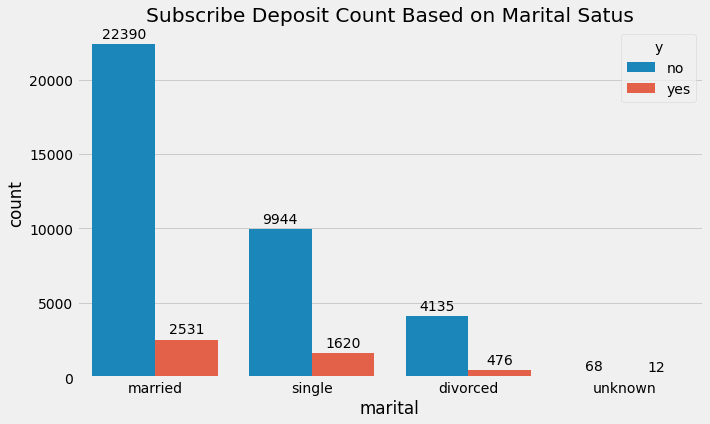

In [207]:
plt.figure(figsize = (10,6))
plt.title('Subscribe Deposit Count Based on Marital Satus')
fig = sns.countplot(x = df['marital'], hue=df['y'])
for p in fig.patches:
  fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

Pada kelompok status perkawinan/marrital status pasangan suami istri cenderung berlangganan term dibandingkan dengan status single dan divorced.

**Pekerjaan apa yang kemungkinan besar akan berlangganan term deposit?**

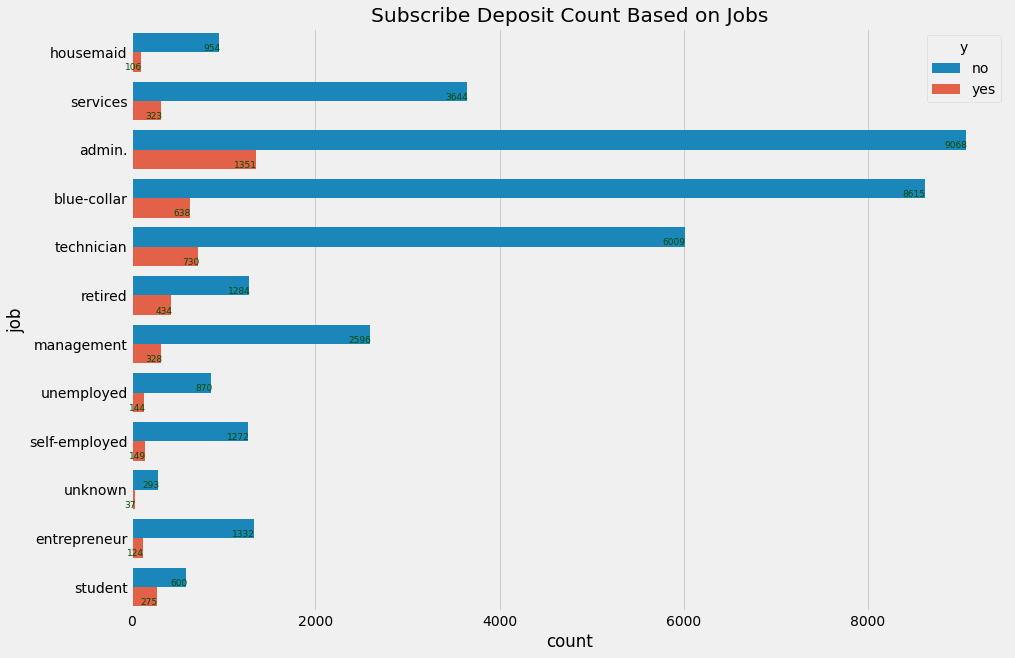

In [208]:
plt.figure(figsize = (14,10))
plt.title('Subscribe Deposit Count Based on Jobs')
fig = sns.countplot(y = df['job'], hue=df['y'])
for p in fig.patches:
    fig.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(1, -18),fontsize=9,color='#004d00',textcoords='offset points', horizontalalignment='right')
plt.show()

admin, technician, dan blue-collar cenderung berlangganan term deposit. Namun menurut saya fitur ini tidak terlalu berpengaruh pada variabel prediksi. Jadi saya akan mendropnya.

In [209]:
df.groupby(["y"]).median()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
no,38.0,164.0,2.0,999.0,0.0,1.1,93.918,-41.8,4.857,5195.8
yes,37.0,449.0,2.0,999.0,0.0,-1.8,93.200,-40.4,1.266,5099.1


- Pelanggan yang berlangganan dan tidak berlangganan memiliki median usia 37-38 tahun.
- Pelanggan yang berlangganan memiliki durasi yang lebih lama pada saat terakhir dihubungi oleh bank yaitu sekitar 449 detik atau 7,5 menit. Pelanggan yang tidak berlangganan memiliki durasi yang lebih rendah yaitu 164 detik atau 2,7 menit. Hal ini sesuai dengan deskripsi dataset variabel duration dimana mereka yang memiliki durasi 0 tidak berlangganan term deposit.


In [210]:
df.groupby(["y"]).agg({'campaign':['max', 'min',np.ptp, 'std']})

campaign                  
         max min ptp       std
y                             
no        56   1  55  2.873768
yes       23   1  22  1.666353

- Pelanggan yang berlangganan dan tidak berlangganan memiliki median jumlah kontak yang sama yang dilakukan selama campaign ini. Tetapi kita juga dapat menyimpulkan bahwa jumlah maksimum kontak yang dilakukan untuk pelanggan yang akhirnya berlangganan lebih rendah yaitu 23 berbanding 56.

In [211]:
df[df['pdays'] != 999].groupby(['y']).agg({'pdays':['median','mean','max', 'min',np.ptp, 'std',lambda x: np.percentile(x, q=25),lambda x: np.percentile(x, q=75)]})

pdays                                                      
    median      mean max min ptp       std <lambda_0> <lambda_1>
y                                                               
no     6.0  6.193431  22   0  22  3.987525        3.0        9.0
yes    6.0  5.913133  27   0  27  3.727896        3.0        6.0

- Fitur `pdays` adalah jumlah hari yang berlalu setelah klien terakhir dihubungi dari campaign sebelumnya. Seperti yang dinyatakan dalam deskripsi dataset, fitur ini memiliki nilai yang sangat tinggi pada rentang nilai positif (999) yang menunjukkan bahwa klien tidak pernah dihubungi sebelumnya. Hal ini mempengaruhi seluruh distribusi, kita tidak dapat melihat median sebenarnya bagi mereka yang telah dihubungi yang akhirnya berlangganan/tidak berlangganan.

In [212]:
df.groupby(['y']).agg({'emp_var_rate':['median','mean','max', 'min',np.ptp, 'std',lambda x: np.percentile(x, q=25),lambda x: np.percentile(x, q=75)]})

emp_var_rate                                                         
          median      mean  max  min  ptp       std <lambda_0> <lambda_1>
y                                                                        
no           1.1  0.248885  1.4 -3.4  4.8  1.482873       -1.8        1.4
yes         -1.8 -1.233089  1.4 -3.4  4.8  1.623616       -1.8       -0.1

- Emp_var_rate (employment variation rate/employment rate dispersion) adalah koefisien variasi tingkat pekerjaan regional di suatu negara, yang dibobot dengan populasi absolut (populasi aktif) dari setiap wilayah yang diagregasi secara triwulanan. Nilai emp_var_rate bagi mereka yang berlangganan berada dalam kisaran -1,8 hingga -0,1 atau kira-kira memiliki median -1,8 yang lebih kecil daripada mereka yang tidak berlangganan.

In [213]:
df.groupby(['y']).agg({'cons_price_idx':['median','mean','max', 'min',np.ptp, 'std',lambda x: np.percentile(x, q=25),lambda x: np.percentile(x, q=75)]})

cons_price_idx                                                         \
            median       mean     max     min    ptp       std <lambda_0>   
y                                                                           
no          93.918  93.603798  94.767  92.201  2.566  0.559006     93.075   
yes         93.200  93.354577  94.767  92.201  2.566  0.676592     92.893   

                
    <lambda_1>  
y               
no      93.994  
yes     93.918

- cons_price_idx adalah indeks harga konsumen yang dikumpulkan setiap bulan. Ini mengukur rata-rata perubahan harga dari waktu ke waktu yang konsumen bayar untuk barang dan jasa. Fitur ini memiliki rentang nilai yang kecil, sebagian besar berada dalam kisaran 92,2 hingga 94,7. Median mereka yang memutuskan untuk berlangganan sedikit lebih kecil daripada median yang tidak berlangganan.

In [214]:
df.groupby(['y']).agg({'cons_conf_idx':['median','mean','max', 'min',np.ptp, 'std',lambda x: np.percentile(x, q=25),lambda x: np.percentile(x, q=75)]})

cons_conf_idx                                                             
           median       mean   max   min   ptp       std <lambda_0> <lambda_1>
y                                                                             
no          -41.8 -40.593232 -26.9 -50.8  23.9  4.390759      -42.7      -36.4
yes         -40.4 -39.791119 -26.9 -50.8  23.9  6.139657      -46.2      -36.1

- cons_conf_idx adalah indeks kepercayaan konsumen yang dikumpulkan setiap bulan. Ini mengukur seberapa optimis atau pesimis konsumen mengenai situasi keuangan yang mereka harapkan. Mayoritas berada dalam kisaran -50,8 hingga -26,9 . Median mereka yang memutuskan untuk berlangganan sedikit lebih besar daripada median yang tidak berlangganan.

In [215]:
df.groupby(['y']).agg({'euribor3m':['median','mean','max', 'min',np.ptp, 'std',lambda x: np.percentile(x, q=25),lambda x: np.percentile(x, q=75)]})

euribor3m                                                               
       median      mean    max    min    ptp       std <lambda_0> <lambda_1>
y                                                                           
no      4.857  3.811482  5.045  0.634  4.411  1.638179      1.405      4.962
yes     1.266  2.123362  5.045  0.634  4.411  1.742717      0.849      4.406

- euribor3m (Euro Interbank Offered Rate) adalah suku bunga Euribor yang didasarkan pada suku bunga rata-rata di mana panel besar bank-bank Eropa meminjam dana dari satu sama lain. Fitur ini adalah agregasi dari tarif 3 bulan. Rentang fitur ini sangat berbeda dengan atribut lainnya yang memuat informasi sosial dan ekonomi. Mayoritas berada dalam kisaran 0,634 hingga 5,045. Median mereka yang memutuskan untuk berlangganan sedikit lebih kecil daripada median yang tidak berlangganan.

In [216]:
df.groupby(['y']).agg({'nr_employed':['median','mean','max', 'min',np.ptp, 'std',lambda x: np.percentile(x, q=25),lambda x: np.percentile(x, q=75)]})

nr_employed                                                            \
         median         mean     max     min    ptp        std <lambda_0>   
y                                                                           
no       5195.8  5176.165690  5228.1  4963.6  264.5  64.570288     5099.1   
yes      5099.1  5095.120069  5228.1  4963.6  264.5  87.581640     5017.5   

                
    <lambda_1>  
y               
no      5228.1  
yes     5191.0

- nr_employed adalah jumlah karyawan yang diagregasi setiap tiga bulan. Mayoritas berada dalam kisaran 4963.6 hingga 5228.1 Median mereka yang memutuskan untuk berlangganan sedikit lebih kecil daripada median yang tidak berlangganan.

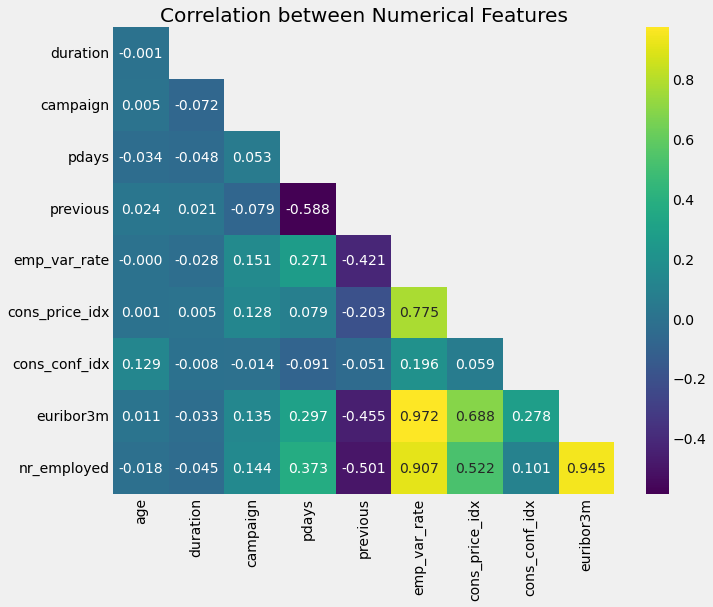

In [217]:
corr_ = df[num_cols].corr(method = 'pearson')
corr_ = corr_.mask(np.tril(np.ones(corr_.shape)).T.astype(np.bool_)).drop(index=["age"], columns=["nr_employed"])

plt.figure(figsize = (10, 8))
sns.heatmap(
    corr_,
    annot = True,
    fmt = '.3f',
    cmap = 'viridis'
)
plt.title("Correlation between Numerical Features")
plt.yticks(rotation=0)
plt.show()

Ada korelasi tinggi antara beberapa fitur:

- euribor3m - emp_var_rate (97%)

- nr_employed - emp_var_rate (91%)

- nr_employed - euribor3m (95%)

## Categorical Features

In [218]:
cat_cols = list(df.select_dtypes(object).drop(columns=["y"]).columns)
cat_cols[2], cat_cols[1] = cat_cols[1], cat_cols[2]
print("Cat Features Length",len(cat_cols), ":", cat_cols)

Cat Features Length 10 : ['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


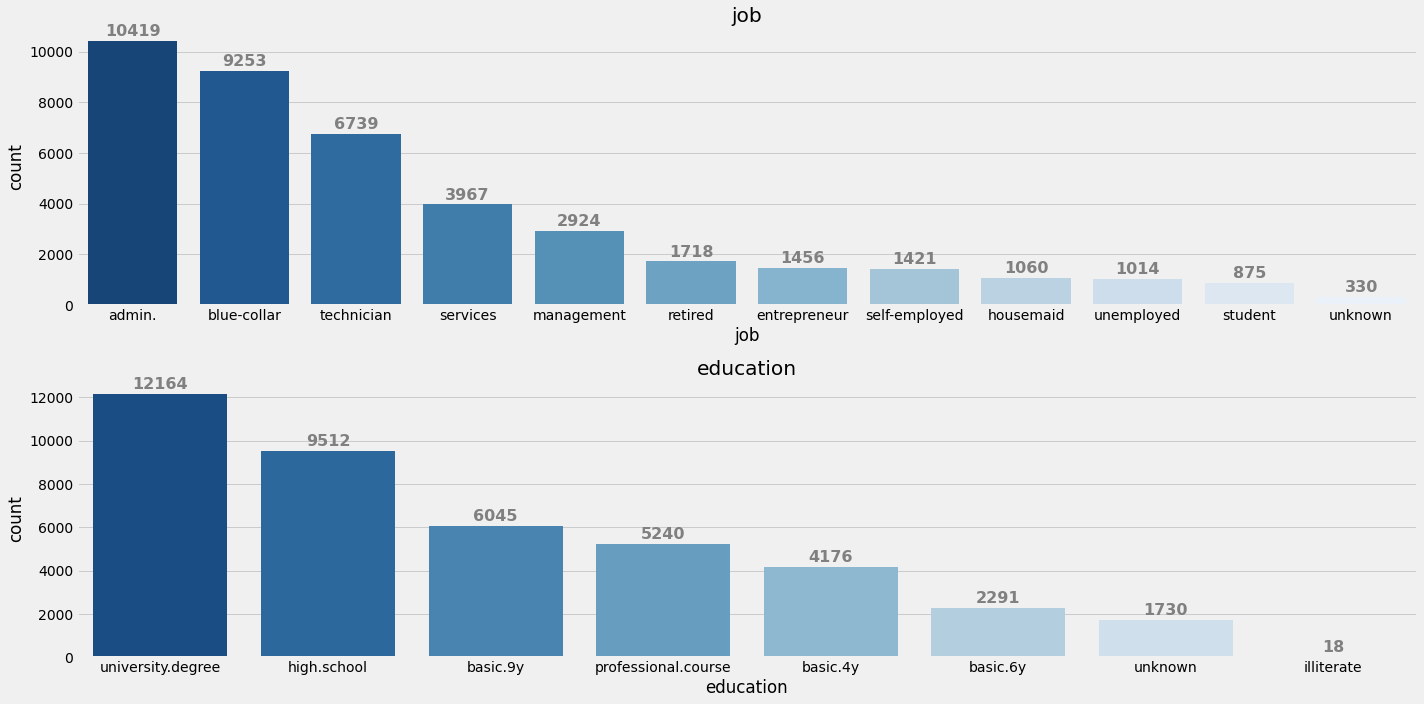

In [219]:
# plot semua categorical features
plt.figure(figsize = (20, 10))
for i in range(len(cat_cols[:2])):
    plt.subplot(len(cat_cols[:2])//1, 1, i + 1)
    ax = sns.countplot(
        x = df[cat_cols[:2][i]],
        # order by frequency
        order = df[cat_cols[:2][i]].value_counts().sort_values(ascending = False).index,
        palette="Blues_r"
    )
    
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 16,
            xytext = (0, 5), 
            textcoords = 'offset points',
            color = 'grey'
        )
    ax.set_title(cat_cols[:2][i], fontweight = 20)
plt.tight_layout()
plt.show()

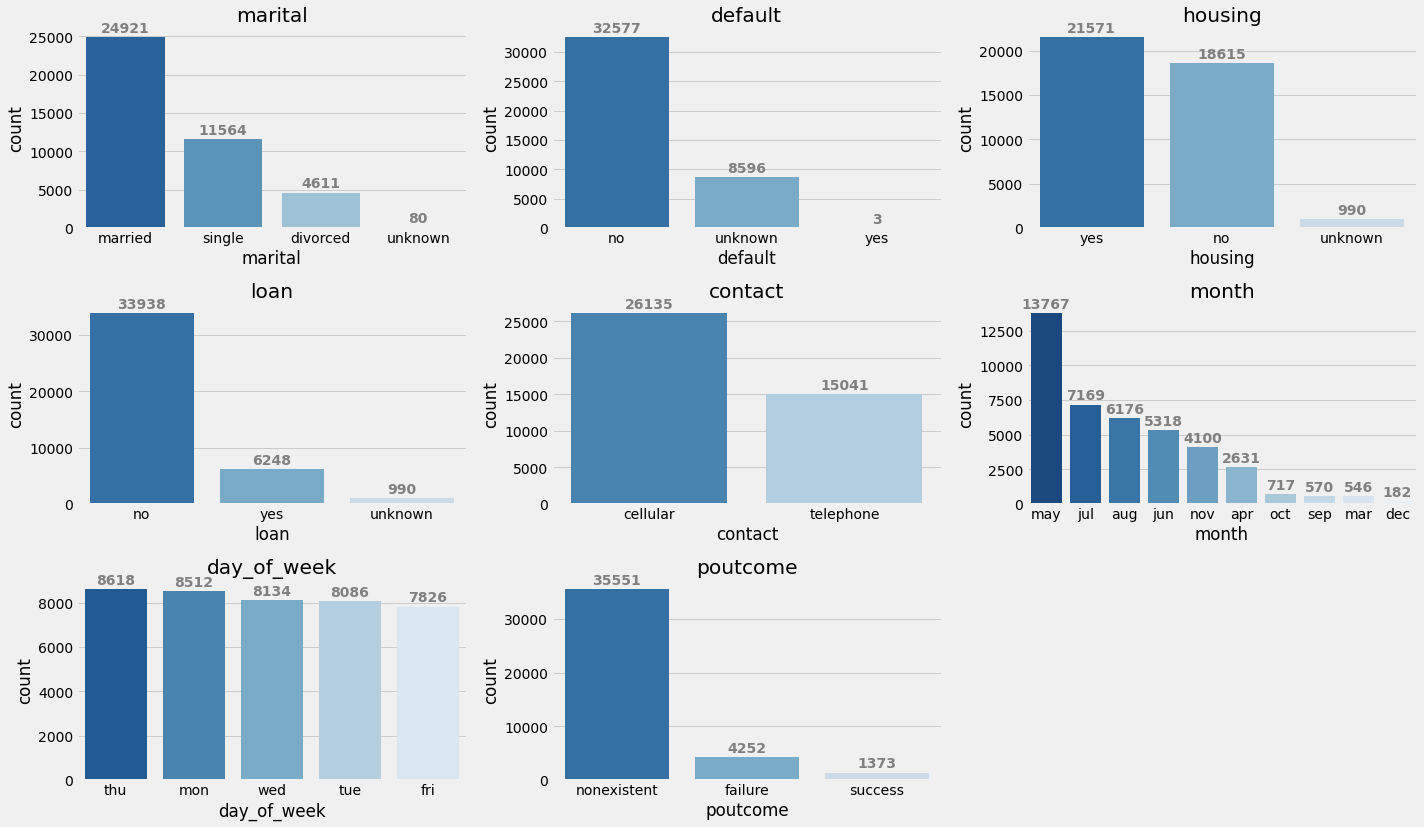

In [220]:
# plot semua categorical features
plt.figure(figsize = (20, 15))
for i in range(len(cat_cols[2:])):
    plt.subplot(len(cat_cols[2:])//2, 3, i + 1)
    ax = sns.countplot(
        x = df[cat_cols[2:][i]],
        # order by frequency
        order = df[cat_cols[2:][i]].value_counts().sort_values(ascending = False).index,
        palette="Blues_r"
    )
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 14,
            xytext = (0, 5), 
            textcoords = 'offset points',
            color = 'grey'
        )
    ax.set_title(cat_cols[2:][i], fontweight = 20)
plt.tight_layout()
plt.show()

- Mayoritas orang memiliki nonexistent outcomes dari campaign pemasaran sebelumnya (poutcome), tidak ada pinjaman pribadi (loan), tidak ada kredit default.
- Mayoritas orang memiliki pekerjaan sebagai admin, blue-collar, dan technician.
- Mayoritas orang memiliki gelar sarjana.
- Mayoritas orang sudah menikah/married.
- Mayoritas orang tidak memiliki kredit default.
- Mayoritas orang memiliki housing loan.
- Mayoritas orang tidak memiliki pinjaman pribadi/personal loan.
- Mayoritas orang memiliki cellular contacts.
- Mayoritas orang terakhir dihubungi pada bulan Mei.

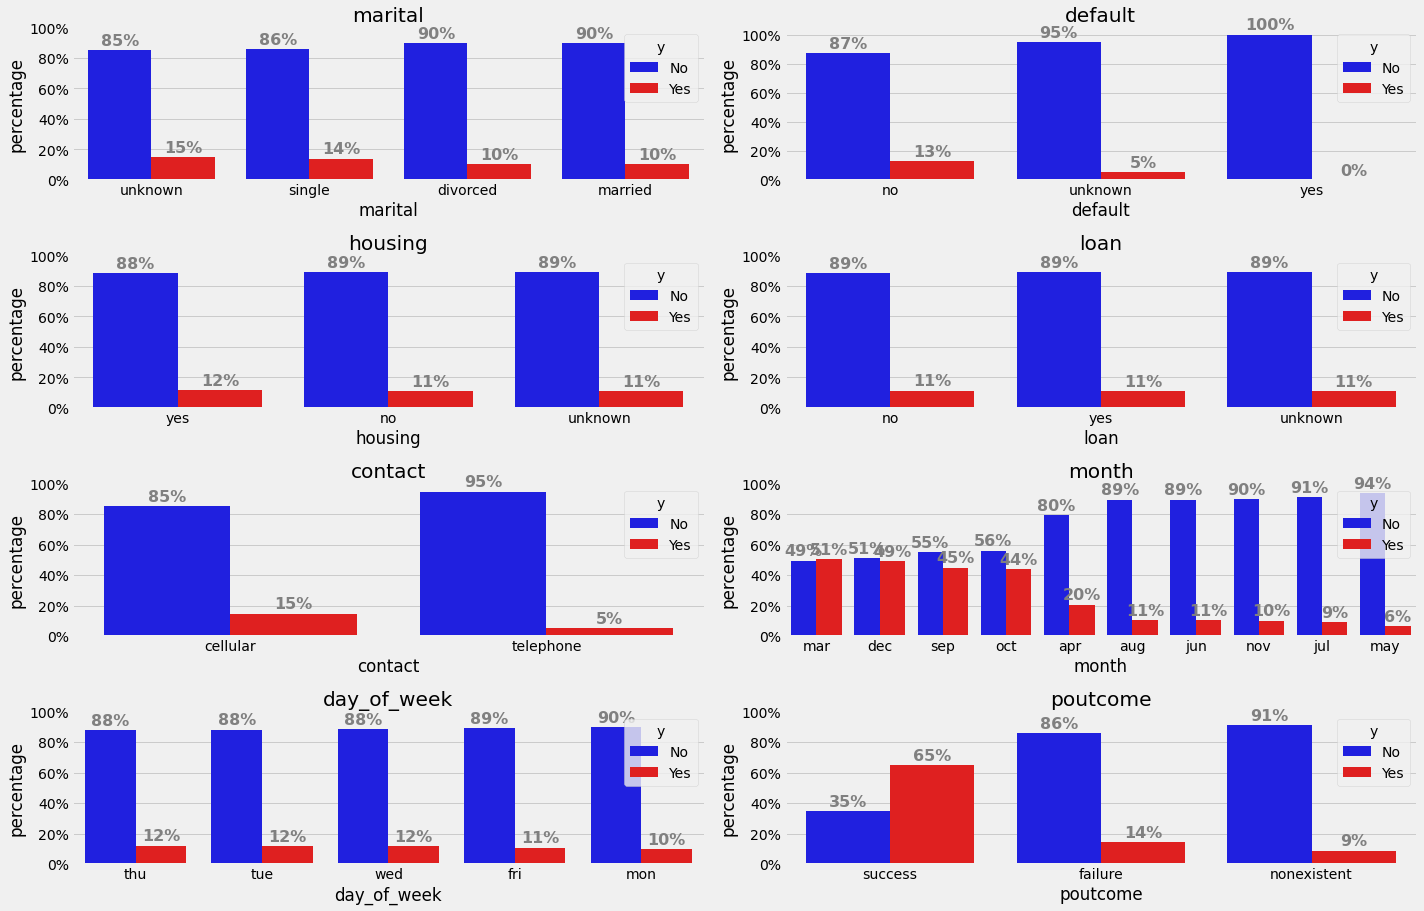

In [221]:
# plot persentase semua categorical features
plt.figure(figsize = (20, 25))

for i in range(len(cat_cols[2:])):
    # create persentase df
    dist = df.groupby([str(cat_cols[2:][i]), "y"]).count()[["age"]]
    if cat_cols[2:][i] == "default":
        dist.loc[("yes", "yes"),"age"] = 0
    cat_group = df.groupby([str(cat_cols[2:][i])]).count()[["age"]]
    dist["percentage"] = dist.div(cat_group, level = str(cat_cols[2:][i])) * 100
    dist.reset_index(inplace = True)
    dist.columns = [str(cat_cols[2:][i]), "y", "count", "percentage"]
    
    # plot
    plt.subplot(len(cat_cols[2:])//1, 2, i + 1)
    ax = sns.barplot(
        x = str(cat_cols[2:][i]),
        y = "percentage",
        hue = "y",
        data = dist,
        order = dist.iloc[dist[dist['y'] == "yes"]['percentage'].sort_values(ascending = False).index][str(cat_cols[2:][i])],
        palette = {"yes":"red", "no":"blue"}
    )
    ax.set_title(cat_cols[2:][i], fontweight = 20)
    
    # set yticks format
    y_ = [x for x in range(0, 120, 20)]
    plt.yticks(y_)
    ylabels = [format(y) + '%' for y in ax.get_yticks()]
    ax.set_yticklabels(labels = ylabels)
    
    # annotate bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f') + "%",
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 16,
            xytext = (0, 5), 
            textcoords = 'offset points',
            color = 'grey'
        )
        # set legend label
        L = ax.legend(loc='upper right', title="y")
        L.get_texts()[0].set_text('No')
        L.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.show()

- Untuk marital features, kita tahu bahwa orang yang statusnya **Unknown** memiliki rasio tertinggi, tetapi jika kita melihat jumlah total orang dalam grup ini, itu tidak signifikan karena kita hanya memiliki sebagian kecil orang yang termasuk dalam grup ini . Rasio tertinggi ke-2 adalah **single**.

- Mayoritas orang yang tidak memiliki default credit, memiliki rasio tertinggi dari orang-orang yang berlangganan deposito berjangka.
    - Sebuah default terjadi ketika peminjam tidak dapat melakukan pembayaran tepat waktu, melewatkan pembayaran, atau menghindari atau berhenti melakukan pembayaran bunga atau pokok hutang. Dengan demikian, masuk akal jika orang yang tidak dapat melakukan pembayaran tepat waktu tidak akan berlangganan deposito berjangka.

- Orang yang memiliki housing loan memiliki rasio yang lebih tinggi dari orang yang berlangganan.

- Rasio orang yang memiliki pinjaman/loan tampaknya sama, tetapi dari jumlah total orang dalam kelompok, mereka yang tidak memiliki pinjaman pribadi/personal loan memiliki jumlah orang yang berlangganan lebih tinggi.

- Mayoritas orang yang dihubungi melalui ponselnya lebih cenderung berlangganan.

- Orang yang dihubungi pada bulan Maret, Desember, September, dan Oktober tampaknya memiliki rasio yang lebih tinggi dari orang yang berlangganan deposito berjangka. Namun faktanya, saya menemukan bahwa jumlah orang yang dihubungi selama bulan-bulan tersebut sangat sedikit.

- Rasio antara each day of the week (satu-satunya hari kerja yang ada) semuanya sama. Fitur ini tidak akan memberikan kekuatan prediksi untuk model.


## Target Variable

In [222]:
df.groupby(["y"]).count()[["age"]].rename({"age" : "Count"}, axis = 1)

,Count
y,
no,36537
yes,4639


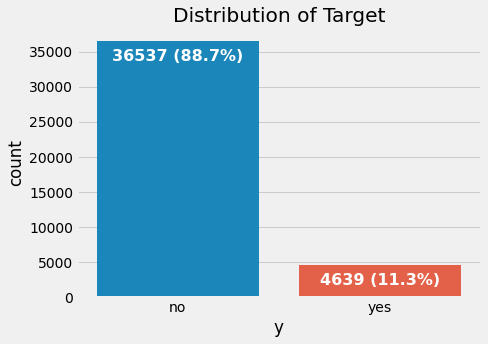

In [223]:
plt.figure(figsize = (7, 5))
ax = sns.countplot(
    x = df["y"],
)
ax.set_title("Distribution of Target")
# annotate bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f') + " (" + format(p.get_height()*100/len(df), '.1f') + "%)",
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 16,
        xytext = (0, -20), 
        textcoords = 'offset points',
        color = 'white'
    )
plt.tight_layout()
plt.show()

# Data Preprocessing

In [224]:
pd.options.mode.chained_assignment = None  # default='warn'

## Target Variable

In [225]:
df["target"] = df["y"].apply(lambda x: 1 if x == "yes" else 0)
df.drop(columns=["y"], inplace = True)


In [226]:
df[["target"]]



,target
0,0
1,0
2,0
3,0
4,0
...,...
41171,1
41172,0
41173,0
41174,1


## Replace and String Formatting

In [227]:
df["job"] = df["job"].str.replace('.', '', regex = False)
df["education"] = df["education"].str.replace('.', ' ', regex = False)

In [228]:
df["pdays"].value_counts()

999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

Mengganti pdays yang memiliki nilai 999 karena sangat jauh dari distribusi.

In [229]:
df["pdays"] = df["pdays"].replace(999, -1)

In [230]:
df["pdays"].value_counts().head(5)

-1    39661
 3      439
 6      412
 4      118
 9       64
Name: pdays, dtype: int64

## Split Data

In [231]:
X = df.drop(columns = ['target'], axis = 1)
y = df['target']

In [232]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [233]:
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size = 1/3, random_state = 42, stratify = y_)

In [234]:
print(len(X_train)/len(X), len(X_val)/len(X), len(X_test)/len(X))

0.699995142801632 0.19999514280163203 0.10000971439673596


In [235]:
print(sum(y_train==1)/len(y_train), sum(y_val==1)/len(y_val), sum(y_test==1)/len(y_test))

0.1126530895465427 0.11268973891924712 0.11267605633802817


## Feature Selection

In [236]:
X_train_num = X_train._get_numeric_data()

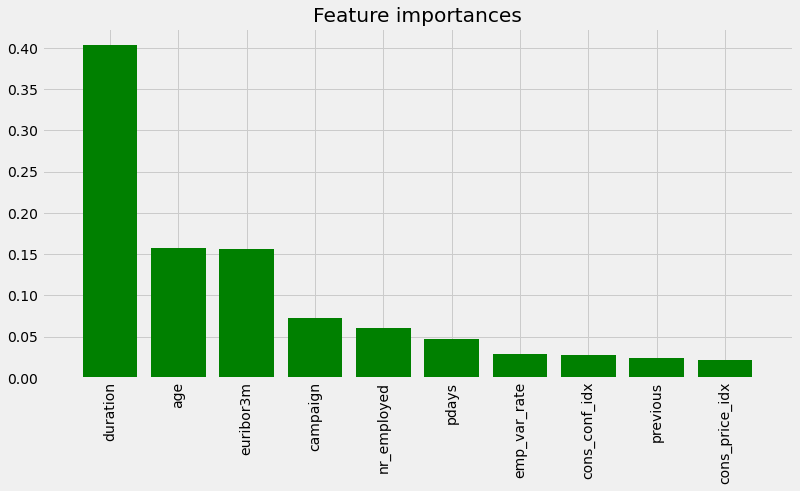

In [237]:
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier(n_estimators=400)
model.fit(X_train_num, y_train)

# feature_importances_ dari highest ke lowest
sorted_idx = np.argsort(model.feature_importances_)
sorted_idx = sorted_idx[::-1]

# plot feature importances
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(X_train_num.shape[1]), model.feature_importances_[sorted_idx],
        color="green", align="center")
plt.xticks(range(X_train_num.shape[1]), X_train_num.columns[sorted_idx], rotation=90)
plt.xlim([-1, X_train_num.shape[1]])
plt.show()

Dalam data di atas, ada beberapa fitur yang ingin saya pertahankan dan akan menghapus kolom yang tidak digunakan

Berdasarkan EDA, saya melihat ada beberapa numerical feature yang sangat berkorelasi. Oleh karena itu saya harus menghapus fitur yang sangat berkorelasi sehingga model tidak membingungkan fitur mana yang mempengaruhi hasil. Tetapi untuk memahami seluruh korelasi saya akan menghitung VIF (Variation Inflation Factor).


Source: <a href="https://towardsdatascience.com/everything-you-need-to-know-about-multicollinearity-2f21f082d6dc">Referensi untuk Multicollinearity</a>

In [238]:
df_features = df.drop(columns=["target"])

In [239]:
vif = pd.DataFrame()
vif["features"] = df_features.select_dtypes("number").columns
vif["VIF"] = [variance_inflation_factor(df_features.select_dtypes("number").values, i) for i in range(len(vif))]
vif

,features,VIF
0,age,16.048334
1,duration,2.011078
2,campaign,1.921496
3,pdays,1.754077
4,previous,1.810264
5,emp_var_rate,28.955180
6,cons_price_idx,22652.449181
7,cons_conf_idx,119.601823
8,euribor3m,226.409701
9,nr_employed,26606.046299


Saya akan melakukan drop untuk features dengan skor VIF >20.000

In [240]:
vif = pd.DataFrame()
vif["features"] = df_features.select_dtypes("number").drop(columns=["cons_price_idx", "cons_conf_idx", "euribor3m"]).columns
vif["VIF"] = [variance_inflation_factor(df_features.select_dtypes("number").drop(columns=["cons_price_idx", "cons_conf_idx", "euribor3m"]).values, i) for i in range(len(vif))]
vif

,features,VIF
0,age,15.736196
1,duration,2.006385
2,campaign,1.912160
3,pdays,1.676804
4,previous,1.736831
5,emp_var_rate,1.243899
6,nr_employed,18.538094


In [241]:
num_cols_multicoll = ["cons_price_idx", "nr_employed", "euribor3m", "pdays", "cons_conf_idx"]

Fitur-fitur di bawah ini adalah fitur-fitur yang memiliki multikolinearitas dengan fitur-fitur lainnya.

In [242]:
num_cols_multicoll

['cons_price_idx', 'nr_employed', 'euribor3m', 'pdays', 'cons_conf_idx']

In [243]:
num_cols = list(vif["features"].values)
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'nr_employed']

Drop fitur dengan multikolinearitas (di atas > 10).

In [244]:
df.drop(columns=num_cols_multicoll, inplace=True)

## Feature Encoding

In [245]:
df[cat_cols].head()

,job,education,marital,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,basic 4y,married,no,no,no,telephone,may,mon,nonexistent
1,services,high school,married,unknown,no,no,telephone,may,mon,nonexistent
2,services,high school,married,no,yes,no,telephone,may,mon,nonexistent
3,admin,basic 6y,married,no,no,no,telephone,may,mon,nonexistent
4,services,high school,married,no,no,yes,telephone,may,mon,nonexistent


  Non-ordinal feature:
- job, marital, default, housing, loan, contact, poutcome.
- encoded dengan OHE.

Ordinal feature:
- education
- encoded dengan ordinal encoder.


In [246]:
print(cat_cols)

['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


### Non-ordinal

In [247]:
non_ordinal_cols = [i for i in cat_cols if i not in ["education", "month", "day_of_week"]]

In [248]:
for i in range(len(non_ordinal_cols)):
    dummies = pd.get_dummies(df[non_ordinal_cols[i]], prefix = non_ordinal_cols[i], drop_first=True)
    df = pd.concat([df, dummies], axis = 1)

df.drop(columns = non_ordinal_cols, inplace = True)


In [249]:
print(df.shape)
df.head()

(41176, 32)


,age,education,month,day_of_week,duration,campaign,previous,emp_var_rate,target,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,56,basic 4y,may,mon,261,1,0,1.1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
1,57,high school,may,mon,149,1,0,1.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0
2,37,high school,may,mon,226,1,0,1.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
3,40,basic 6y,may,mon,151,1,0,1.1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
4,56,high school,may,mon,307,1,0,1.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0


### Ordinal

In [250]:
df["education"].value_counts()

university degree      12164
high school             9512
basic 9y                6045
professional course     5240
basic 4y                4176
basic 6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [251]:
education_encoder = OrdinalEncoder(categories = [['illiterate', 'basic 4y', 'basic 6y', 'basic 9y', 'high school', 'professional course', 'university degree']], handle_unknown="use_encoded_value", unknown_value=-1, dtype = np.int64)

In [252]:
except_unknown_idx = list(df[df['education'] != 'unknown'].index)
unknown_idx = list(df[df['education'] == 'unknown'].index)

In [253]:
df.loc[except_unknown_idx, 'education'] = education_encoder.fit_transform(np.expand_dims(np.array(df['education'].iloc[except_unknown_idx]), axis=1))

In [254]:
df.loc[unknown_idx, 'education'] = education_encoder.transform(np.expand_dims(np.array(df['education'].iloc[unknown_idx]), axis=1))

In [255]:
df["education"].value_counts()

 6    12164
 4     9512
 3     6045
 5     5240
 1     4176
 2     2291
-1     1730
 0       18
Name: education, dtype: int64

In [256]:
df.drop(columns=['month', 'day_of_week'], inplace = True)

In [257]:
print(df.shape)
df.head()

(41176, 30)


,age,education,duration,campaign,previous,emp_var_rate,target,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,56,1,261,1,0,1.1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
1,57,4,149,1,0,1.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0
2,37,4,226,1,0,1.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
3,40,2,151,1,0,1.1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
4,56,4,307,1,0,1.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0


## Split Dataset

In [258]:
X = df.drop(columns = ['target'], axis = 1)
y = df['target']

In [259]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [260]:
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size = 1/3, random_state = 42, stratify = y_)

In [261]:
print(len(X_train)/len(X), len(X_val)/len(X), len(X_test)/len(X))

0.699995142801632 0.19999514280163203 0.10000971439673596


In [262]:
print(sum(y_train==1)/len(y_train), sum(y_val==1)/len(y_val), sum(y_test==1)/len(y_test))

0.1126530895465427 0.11268973891924712 0.11267605633802817


## Handling Outlier Train

In [263]:
num_train = X_train._get_numeric_data()
for k, v in num_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)
  print(lower_bound)
  print(upper_bound)

  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_train)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

 

9.5
69.5
Column age outliers = 1.10%
-223.5
644.5
Column duration outliers = 7.19%
-2.0
6.0
Column campaign outliers = 8.21%
0.0
0.0
Column previous outliers = 100.00%
-6.6000000000000005
6.200000000000001
Column emp_var_rate outliers = 0.00%
0.0
0.0
Column job_blue-collar outliers = 100.00%
0.0
0.0
Column job_entrepreneur outliers = 100.00%
0.0
0.0
Column job_housemaid outliers = 100.00%
0.0
0.0
Column job_management outliers = 100.00%
0.0
0.0
Column job_retired outliers = 100.00%
0.0
0.0
Column job_self-employed outliers = 100.00%
0.0
0.0
Column job_services outliers = 100.00%
0.0
0.0
Column job_student outliers = 100.00%
0.0
0.0
Column job_technician outliers = 100.00%
0.0
0.0
Column job_unemployed outliers = 100.00%
0.0
0.0
Column job_unknown outliers = 100.00%
-1.5
2.5
Column marital_married outliers = 0.00%
-1.5
2.5
Column marital_single outliers = 0.00%
0.0
0.0
Column marital_unknown outliers = 100.00%
0.0
0.0
Column default_unknown outliers = 100.00%
0.0
0.0
Column default_yes 

In [264]:
from feature_engine.outliers import Winsorizer
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['campaign','duration'])

windsoriser.fit(X_train)

X_train = windsoriser.transform(X_train)

## Features Scaling using Pipeline

In [265]:
scaling_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [266]:
scaling_pipeline.fit(X_train)

Pipeline(steps=[('std_scaler', StandardScaler())])

Scaling data karena kita memiliki fitur yang memiliki rentang nilai yang sangat berbeda. Ini akan menjadi masalah jika kita tidak melakukan scaling untuk model yang akan dibuat.

In [267]:
X_train_trf = scaling_pipeline.transform(X_train)
X_val_trf = scaling_pipeline.transform(X_val)
X_test_trf = scaling_pipeline.transform(X_test)

# Tuning with Grid Search CV

**Logistic Regression**

In [268]:
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.0001, 0.001, 0.1, 1.0]
}
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1'
}
logreg = LogisticRegression(random_state = 42, solver='liblinear')
logreg_grid = GridSearchCV(logreg, hyperparameters, cv = 5, scoring=scoring, refit='auc', return_train_score=True)
logreg_grid.fit(X_train_trf, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.1, 1.0],
                         'penalty': ['l1', 'l2']},
             refit='auc', return_train_score=True,
             scoring={'auc': 'roc_auc', 'f1': 'f1'})

In [269]:
logreg_grid.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [270]:
logreg_grid.best_score_

0.9215514054872818

**SVC**

In [271]:
import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*')

In [272]:
hyperparameters = {
    'kernel': ['poly', 'rbf']
}
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1'
}
svc = SVC(random_state = 42, gamma = 'auto', max_iter = 2000)
svc_grid = GridSearchCV(svc, hyperparameters, cv = 5, scoring=scoring, refit='auc', return_train_score=True)
svc_grid.fit(X_train_trf, y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto', max_iter=2000, random_state=42),
             param_grid={'kernel': ['poly', 'rbf']}, refit='auc',
             return_train_score=True, scoring={'auc': 'roc_auc', 'f1': 'f1'})

In [273]:
svc_grid.best_params_

{'kernel': 'rbf'}

In [274]:
svc_grid.best_score_

0.8730497953778172

**Decision Tree**

In [275]:
hyperparameters = {
    'max_depth': [2, 10, 30, 100],
    'min_samples_split': [2, 5, 10, 100],
    'min_samples_leaf' : [2, 4, 10, 25],
    'max_features' : ['auto', 'sqrt']
}
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1'
}
dt = DecisionTreeClassifier(random_state = 42)
dt_grid = GridSearchCV(dt, hyperparameters, cv = 5, scoring=scoring, refit='auc', return_train_score=True)
dt_grid.fit(X_train_trf, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 10, 30, 100],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4, 10, 25],
                         'min_samples_split': [2, 5, 10, 100]},
             refit='auc', return_train_score=True,
             scoring={'auc': 'roc_auc', 'f1': 'f1'})

In [276]:
dt_grid.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 100}

In [277]:
dt_grid.best_score_

0.8943877983026167

**Random Forest**

In [278]:
hyperparameters = {
    'max_depth': [10, 30],
    'min_samples_split': [2],
    'min_samples_leaf' : [10],
    'max_features' : ['auto'],
    'n_estimators': [50, 100]
}
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1'
}
rf = RandomForestClassifier(random_state = 14)
rf_grid = GridSearchCV(rf, hyperparameters, cv = 5, scoring=scoring, refit='auc', return_train_score=True)
rf_grid.fit(X_train_trf, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 30], 'max_features': ['auto'],
                         'min_samples_leaf': [10], 'min_samples_split': [2],
                         'n_estimators': [50, 100]},
             refit='auc', return_train_score=True,
             scoring={'auc': 'roc_auc', 'f1': 'f1'})

In [279]:
rf_grid.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

In [280]:
rf_grid.best_score_

0.9338083708942477

**KNearest Neighbors**

In [281]:
hyperparameters = {
    'n_neighbors': [3, 5],
    'p': [1, 2]
}
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1'
}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, hyperparameters, cv = 5, scoring=scoring, refit='auc', return_train_score=True)
knn_grid.fit(X_train_trf, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5], 'p': [1, 2]}, refit='auc',
             return_train_score=True, scoring={'auc': 'roc_auc', 'f1': 'f1'})

In [282]:
knn_grid.best_params_

{'n_neighbors': 5, 'p': 1}

In [283]:
knn_grid.best_score_

0.8310382094973789

**Gaussian Naive Bayes**

In [284]:
hyperparameters = {
    'var_smoothing': np.logspace(0,-9, num=10)
}
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1'
}
gnb = GaussianNB()
gnb_grid = GridSearchCV(gnb, hyperparameters, cv = 5, scoring=scoring, refit='auc', return_train_score=True)
gnb_grid.fit(X_train_trf, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])},
             refit='auc', return_train_score=True,
             scoring={'auc': 'roc_auc', 'f1': 'f1'})

In [285]:
gnb_grid.best_params_

{'var_smoothing': 1.0}

In [286]:
gnb_grid.best_score_

0.8486591813314227

**AdaBoost**

In [287]:
hyperparameters = {
    'learning_rate': [0.1, 1],
    'n_estimators': [20, 50]
}
scoring = {
    'auc': 'roc_auc',
    'f1': 'f1'
}
adb = AdaBoostClassifier(random_state = 42)
adb_grid = GridSearchCV(adb, hyperparameters, cv = 5, scoring=scoring, refit='auc', return_train_score=True)
adb_grid.fit(X_train_trf, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 1], 'n_estimators': [20, 50]},
             refit='auc', return_train_score=True,
             scoring={'auc': 'roc_auc', 'f1': 'f1'})

In [288]:
adb_grid.best_params_

{'learning_rate': 1, 'n_estimators': 50}

In [289]:
adb_grid.best_score_

0.925816036303251

# Define Model

Saya akan membandingkan performa model antara Logistic Regression, SVM, Decision Tree, Random Forest, KNN, Naive Bayes, dan juga AdaBoost sebagai algoritma tambahan untuk melihat sekilas performa dari dataset ini.

In [290]:
models_dict = {}

In [291]:
models_dict["Logistic Regression"] = LogisticRegression(random_state = 14, C = 0.001, penalty = 'l2')
models_dict["SVM"] = SVC(random_state = 14, gamma = 'auto', max_iter = 2000, kernel = 'rbf', probability = True)
models_dict["Decision Tree"] = DecisionTreeClassifier(random_state = 14, max_depth = 30, max_features = 'auto', min_samples_leaf = 10, min_samples_split = 100)
models_dict["RandomForest"] = RandomForestClassifier(random_state = 14, max_depth = 30, max_features = 'auto', min_samples_leaf = 10, min_samples_split = 2, n_estimators = 100)
models_dict["KNearest Neighbors"] = KNeighborsClassifier(n_neighbors = 5, p = 2)
models_dict["Gaussian Naive Bayes"] = GaussianNB(var_smoothing = 1.0)
models_dict["AdaBoost"] = AdaBoostClassifier(random_state = 14, learning_rate = 1, n_estimators = 50)

# Model Training

In [292]:
for model_name, model in models_dict.items():
    print(f"Training model {model_name}")
    %time model.fit(X_train_trf, y_train)

Training model Logistic Regression
CPU times: total: 78.1 ms
Wall time: 74.1 ms
Training model SVM
CPU times: total: 1min 6s
Wall time: 1min 21s
Training model Decision Tree
CPU times: total: 15.6 ms
Wall time: 26.7 ms
Training model RandomForest
CPU times: total: 1.73 s
Wall time: 2.31 s
Training model KNearest Neighbors
CPU times: total: 0 ns
Wall time: 1.32 ms
Training model Gaussian Naive Bayes
CPU times: total: 0 ns
Wall time: 22.4 ms
Training model AdaBoost
CPU times: total: 1.08 s
Wall time: 1.48 s


## Cross Validation Score

In [293]:
def display_score(scores):
    '''
    function to display cross validation mean and std.
    '''
    print(f"Scores: {scores}")
    print(f"Scores mean: {scores.mean()}")
    print(f"Scores Standar Deviation: {scores.std()}")

In [294]:
# create list to store cv scores
scores_cv = []

for model_name, model in models_dict.items():
    print(f"Cross Validation Scores of {model_name}")
    scores = cross_val_score(model, X_train_trf, y_train, scoring = 'roc_auc', cv = 5)
    scores_cv.append(scores)
    display_score(scores)
    print("\n")

Cross Validation Scores of Logistic Regression
Scores: [0.92175368 0.91308309 0.92009038 0.9197094  0.92239569]
Scores mean: 0.9194064467661738
Scores Standar Deviation: 0.0033163068663597263


Cross Validation Scores of SVM
Scores: [0.86291263 0.86834288 0.87665855 0.87965258 0.87768234]
Scores mean: 0.8730497953778172
Scores Standar Deviation: 0.0063717727849792755


Cross Validation Scores of Decision Tree
Scores: [0.87715027 0.88565035 0.89725002 0.91022899 0.90165937]
Scores mean: 0.8943877983026167
Scores Standar Deviation: 0.011708857688136013


Cross Validation Scores of RandomForest
Scores: [0.93542902 0.92977908 0.9361349  0.93565271 0.93204614]
Scores mean: 0.9338083708942477
Scores Standar Deviation: 0.002481187068724007


Cross Validation Scores of KNearest Neighbors
Scores: [0.82155442 0.82708128 0.82971156 0.83165333 0.82768572]
Scores mean: 0.82753726333142
Scores Standar Deviation: 0.003396878290156793


Cross Validation Scores of Gaussian Naive Bayes
Scores: [0.841149

Dari uji cross validation diketahui bahwa random forest memiliki nilai tertinggi pada cv=5.

# Model Evaluation

Sebagai salah satu cara mengetahui evaluasi model yang telah dibuat, maka saya juga akan membandingkan nilai F1 nya dari masing-masinh model.

In [295]:
def plot_roc_curve(fpr, tpr, label=None):
    '''
    ROC Curve plot with diagonal line
    '''
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)  

## Validation

In [296]:
# create list to store prediciton results
train_prediction_results = []
val_prediction_results = []

train_val_time_elapsed = []

for model_name, model in models_dict.items():
    tstart = time.time()
    print(f"Model Validation on {model_name}")
    # predict x val
    model_pred_val = model.predict(X_val_trf)
    
    # append result to list
    val_prediction_results.append(model_pred_val)
    
    model_pred_train = model.predict(X_train_trf)
    train_prediction_results.append(model_pred_train)
    
    tfinish = time.time()
    time_elapsed = round((tfinish - tstart)*1000, 2)
    train_val_time_elapsed.append(time_elapsed)
    print(f"elapsed time: {time_elapsed} ms")

Model Validation on Logistic Regression
elapsed time: 9.35 ms
Model Validation on SVM
elapsed time: 57241.83 ms
Model Validation on Decision Tree
elapsed time: 25.31 ms
Model Validation on RandomForest
elapsed time: 2574.34 ms
Model Validation on KNearest Neighbors
elapsed time: 48361.03 ms
Model Validation on Gaussian Naive Bayes
elapsed time: 49.45 ms
Model Validation on AdaBoost
elapsed time: 1187.09 ms


In [297]:
# create list to store prediciton results
y_scores_train = []
y_scores_val = []

for model_name, model in models_dict.items():
    tstart = time.time()
    print(f"Model Validation on {model_name}")
    # predict x val
    scores_val = model.predict_proba(X_val_trf)
    
    # append result to list
    y_scores_val.append(scores_val)
    
    scores_train = model.predict_proba(X_train_trf)
    y_scores_train.append(scores_train)
    
    tfinish = time.time()
    time_elapsed = round((tfinish - tstart)*1000, 2)
    print(f"elapsed time: {time_elapsed} ms")

Model Validation on Logistic Regression
elapsed time: 28.37 ms
Model Validation on SVM
elapsed time: 59850.01 ms
Model Validation on Decision Tree
elapsed time: 33.69 ms
Model Validation on RandomForest
elapsed time: 2325.45 ms
Model Validation on KNearest Neighbors
elapsed time: 50201.68 ms
Model Validation on Gaussian Naive Bayes
elapsed time: 58.79 ms
Model Validation on AdaBoost
elapsed time: 1150.62 ms


## Evaluation

In [298]:
# create list to append evaluation metrics val
f1_val = []
roc_auc_val = []
precision_val = []
recall_val = []
confusion_m_val = []
c_report_val = []

# calculate error val
for y_pred in val_prediction_results:
    roc_auc_val.append(roc_auc_score(y_val, y_pred))
    f1_val.append(f1_score(y_val, y_pred))
    precision_val.append(precision_score(y_val, y_pred))
    recall_val.append(recall_score(y_val, y_pred))
    confusion_m_val.append(confusion_matrix(y_val, y_pred))
    c_report_val.append(classification_report(y_val, y_pred))
    
# create list to append evaluation metrics train
f1_train = []
roc_auc_train = []
precision_train = []
recall_train = []
confusion_m_train = []
c_report_train = []

# calculate error train
for y_pred in train_prediction_results:
    roc_auc_train.append(roc_auc_score(y_train, y_pred))
    f1_train.append(f1_score(y_train, y_pred))
    precision_train.append(precision_score(y_train, y_pred))
    recall_train.append(recall_score(y_train, y_pred))
    confusion_m_train.append(confusion_matrix(y_train, y_pred))
    c_report_train.append(classification_report(y_train, y_pred))

In [299]:
# create list to append fpr, tpr, and threshold val
fpr_val = []
tpr_val = []
threshold_val = []

# calculate curve val
for y_score in y_scores_val:
    fpr_val.append(roc_curve(y_val, y_score[:, 1])[0])
    tpr_val.append(roc_curve(y_val, y_score[:, 1])[1])
    threshold_val.append(roc_curve(y_val, y_score[:, 1])[0])

# create list to append fpr, tpr, and threshold tain
fpr_train = []
tpr_train = []
threshold_train = []

# calculate curve train
for y_score in y_scores_train:
    fpr_train.append(roc_curve(y_train, y_score[:, 1])[0])
    tpr_train.append(roc_curve(y_train, y_score[:, 1])[1])
    threshold_train.append(roc_curve(y_train, y_score[:, 1])[0])

In [300]:
# save models name to list for later
models_name = list(models_dict.keys())

In [301]:
# create dataframe for model performances
eval_dict = {
    'model':models_dict.keys(),
    'ROC_AUC_val': roc_auc_val,
    'ROC_AUC_train': roc_auc_train,
    'F1_val': f1_val, 
    'F1_train': f1_train, 
    'Precision_val': precision_val,
    'Precision_train': precision_train,
    'Recall_val': recall_val,
    'Recall_train': recall_train,
    'Time_Elapsed': train_val_time_elapsed
}
df_results = pd.DataFrame(data=eval_dict)
df_results = df_results.set_index("model")

In [302]:
df_results.sort_values(['ROC_AUC_val', 'ROC_AUC_train', 'F1_val', 'F1_train'], ascending = False)

,ROC_AUC_val,ROC_AUC_train,F1_val,F1_train,Precision_val,Precision_train,Recall_val,Recall_train,Time_Elapsed
model,,,,,,,,,
Logistic Regression,0.683606,0.618541,0.482759,0.368945,0.609195,0.695986,0.399784,0.251001,9.35
SVM,0.677499,0.632786,0.444315,0.382451,0.484117,0.529412,0.410560,0.299353,57241.83
AdaBoost,0.667793,0.675181,0.455459,0.473928,0.601770,0.635422,0.366379,0.377887,1187.09
Gaussian Naive Bayes,0.662156,0.639397,0.419605,0.383641,0.471141,0.465116,0.378233,0.326455,49.45
KNearest Neighbors,0.658257,0.728641,0.421914,0.580766,0.507576,0.737666,0.360991,0.478904,48361.03
RandomForest,0.638058,0.676445,0.409602,0.502019,0.674074,0.810014,0.294181,0.363720,2574.34
Decision Tree,0.624246,0.652048,0.369942,0.434908,0.561404,0.652495,0.275862,0.326147,25.31


- Berdasarkan skor AUC, Random Forest Classifier memiliki performa terbaik dibandingkan dengan algoritma lainnya.

- Kita juga tahu bahwa RF juga memiliki presisi tertinggi dibandingkan model lainnya. 

- SVM merupakan model yang membutuhkan waktu paling lama dibanding model lainnya berdasarkan Time Elapsed.


### AUC Score

In [303]:
df_results.sort_values(['ROC_AUC_val', 'ROC_AUC_train'], ascending=False)[['ROC_AUC_val', 'ROC_AUC_train']]

,ROC_AUC_val,ROC_AUC_train
model,,
Logistic Regression,0.683606,0.618541
SVM,0.677499,0.632786
AdaBoost,0.667793,0.675181
Gaussian Naive Bayes,0.662156,0.639397
KNearest Neighbors,0.658257,0.728641
RandomForest,0.638058,0.676445
Decision Tree,0.624246,0.652048


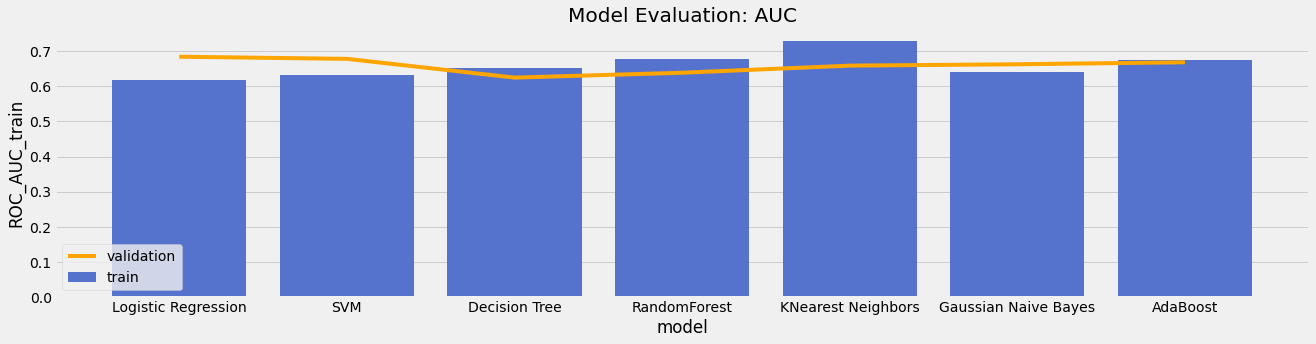

In [304]:
plt.figure(figsize = (18.5, 5))
sns.barplot(
    x = df_results.index, y = df_results["ROC_AUC_train"],
    label = "train", color = "royalblue",
)
sns.lineplot(
    x = df_results.index, y = df_results["ROC_AUC_val"],
    label = "validation", color = "orange"
)
plt.title("Model Evaluation: AUC")
plt.tight_layout()
plt.show()

Secara keseluruhan, Random Forest memiliki nilai UAC tertinggi kedua setelah KNN, namun KNN merupakan model yang paling lambat dibandingkan model lainnya.

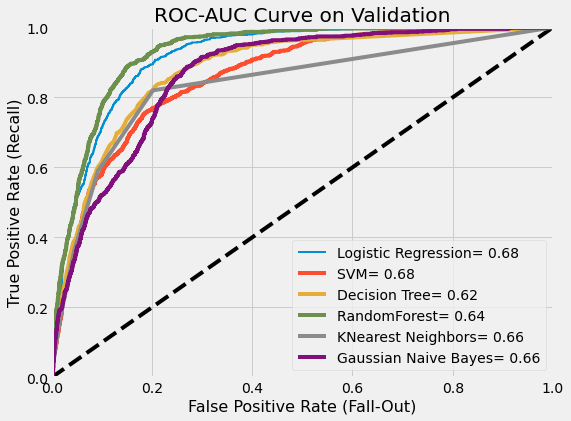

In [305]:
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_val[0], tpr_val[0], label=models_name[0] + "= " + str(round(roc_auc_val[0],2)))
plt.plot(fpr_val[1], tpr_val[1], label=models_name[1] + "= " + str(round(roc_auc_val[1],2)))
plt.plot(fpr_val[2], tpr_val[2], label=models_name[2] + "= " + str(round(roc_auc_val[2],2)))
plt.plot(fpr_val[3], tpr_val[3], label=models_name[3] + "= " + str(round(roc_auc_val[3],2)))
plt.plot(fpr_val[4], tpr_val[4], label=models_name[4] + "= " + str(round(roc_auc_val[4],2)))
plt.plot(fpr_val[5], tpr_val[5], label=models_name[5] + "= " + str(round(roc_auc_val[5],2)))
plt.title("ROC-AUC Curve on Validation")
plt.legend()
plt.show()

### F1 Score

In [306]:
df_results.sort_values(['F1_val', 'F1_train'], ascending=False)[['F1_val', 'F1_train']]

,F1_val,F1_train
model,,
Logistic Regression,0.482759,0.368945
AdaBoost,0.455459,0.473928
SVM,0.444315,0.382451
KNearest Neighbors,0.421914,0.580766
Gaussian Naive Bayes,0.419605,0.383641
RandomForest,0.409602,0.502019
Decision Tree,0.369942,0.434908


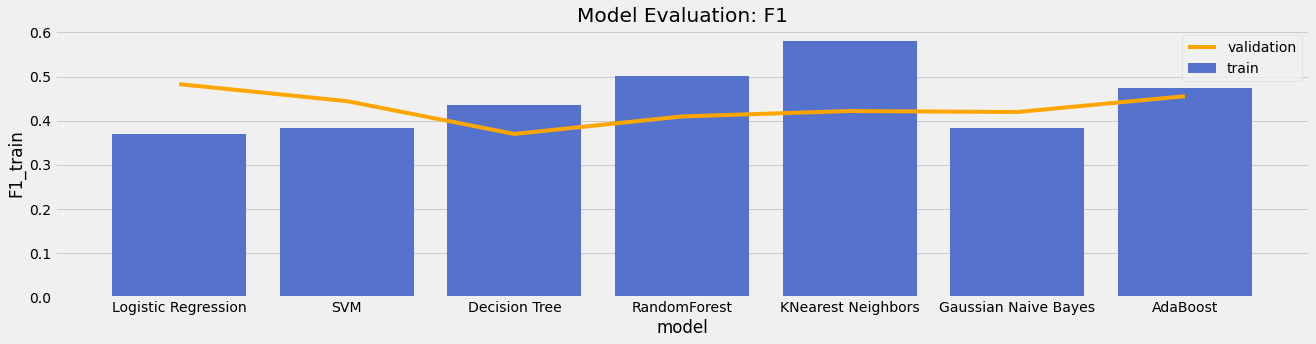

In [307]:
plt.figure(figsize = (18.5, 5))
sns.barplot(
    x = df_results.index, y = df_results["F1_train"],
    label = "train", color = "royalblue",
)
sns.lineplot(
    x = df_results.index, y = df_results["F1_val"],
    label = "validation", color = "orange"
)
plt.title("Model Evaluation: F1")
plt.tight_layout()
plt.show()

- Random Forest memiliki skor terbesar kedua dari nilai F1 tetapi masih kalah dibanding KNN.

### Precision

In [308]:
df_results.sort_values(['Precision_val', 'Precision_train'], ascending=False)[['Precision_val', 'Precision_train']]

,Precision_val,Precision_train
model,,
RandomForest,0.674074,0.810014
Logistic Regression,0.609195,0.695986
AdaBoost,0.601770,0.635422
Decision Tree,0.561404,0.652495
KNearest Neighbors,0.507576,0.737666
SVM,0.484117,0.529412
Gaussian Naive Bayes,0.471141,0.465116


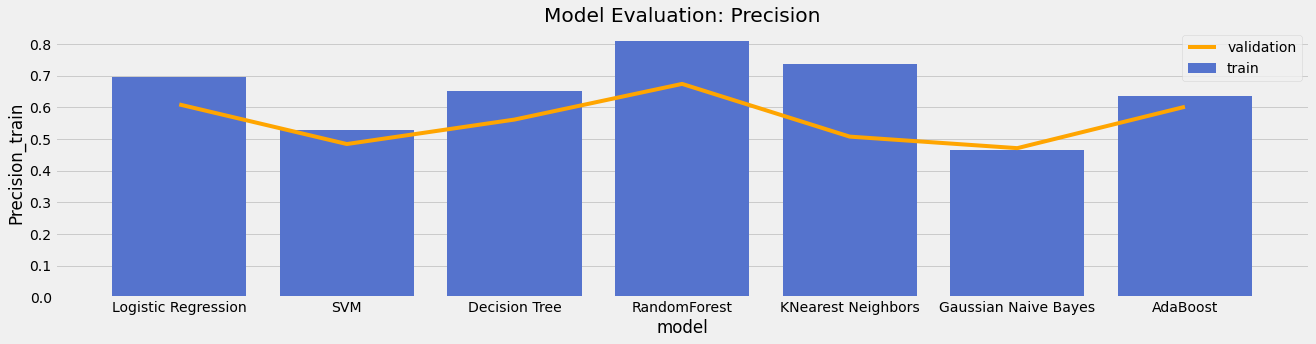

In [309]:
plt.figure(figsize = (18.5, 5))
sns.barplot(
    x = df_results.index, y = df_results["Precision_train"],
    label = "train", color = "royalblue",
)
sns.lineplot(
    x = df_results.index, y = df_results["Precision_val"],
    label = "validation", color = "orange"
)
plt.title("Model Evaluation: Precision")
plt.tight_layout()
plt.show()

- Dalam hal presisi, Random Forest menjadi yang terbaik dibandingkan dengan model algorithma lainnya.

### Recall

In [310]:
df_results.sort_values(['Recall_val', 'Recall_train'], ascending=False)[['Recall_val', 'Recall_train']]

,Recall_val,Recall_train
model,,
SVM,0.410560,0.299353
Logistic Regression,0.399784,0.251001
Gaussian Naive Bayes,0.378233,0.326455
AdaBoost,0.366379,0.377887
KNearest Neighbors,0.360991,0.478904
RandomForest,0.294181,0.363720
Decision Tree,0.275862,0.326147


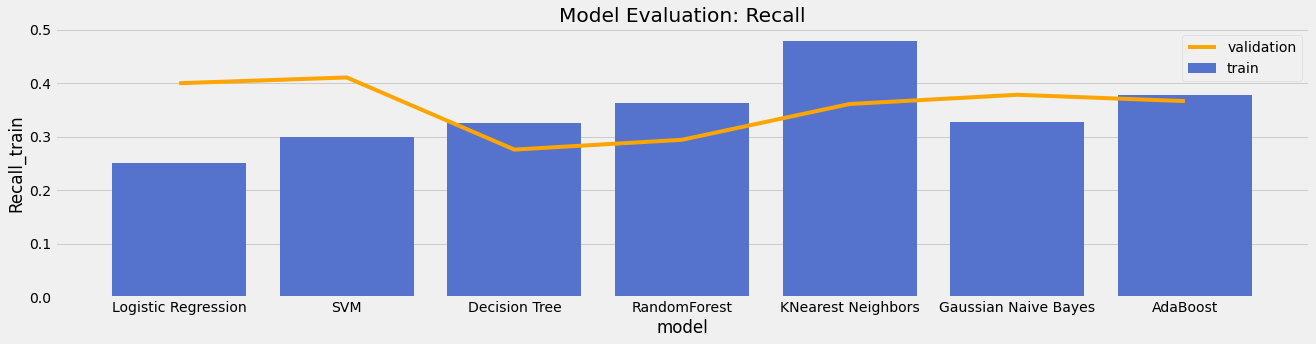

In [311]:
plt.figure(figsize = (18.5, 5))
sns.barplot(
    x = df_results.index, y = df_results["Recall_train"],
    label = "train", color = "royalblue",
)
sns.lineplot(
    x = df_results.index, y = df_results["Recall_val"],
    label = "validation", color = "orange"
)
plt.title("Model Evaluation: Recall")
plt.tight_layout()
plt.show()

- KNN memiliki nilai Recall tertinggi, artinya model ini dapat menangkap lebih banyak aktual kelas 1.

### Time Elapsed

In [312]:
df_results.sort_values(['Time_Elapsed'], ascending=False)[['Time_Elapsed']]

,Time_Elapsed
model,
SVM,57241.83
KNearest Neighbors,48361.03
RandomForest,2574.34
AdaBoost,1187.09
Gaussian Naive Bayes,49.45
Decision Tree,25.31
Logistic Regression,9.35


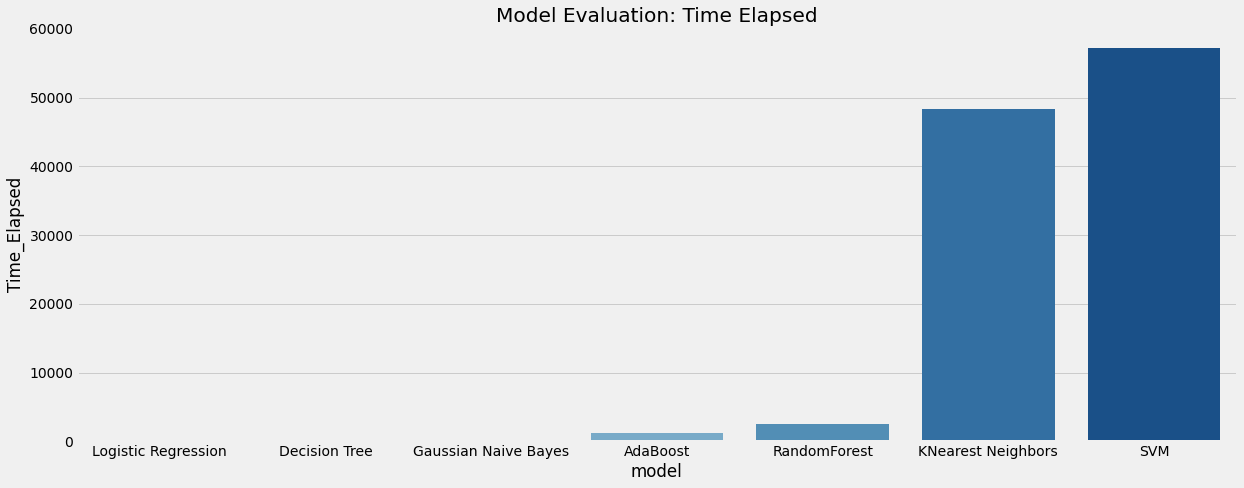

In [313]:
plt.figure(figsize = (17.5, 7))
sns.barplot(
    x = df_results.index, y = df_results["Time_Elapsed"],
    order = df_results["Time_Elapsed"].sort_values(ascending = True).index,
    palette = "Blues"
)
plt.title("Model Evaluation: Time Elapsed")
plt.tight_layout()
plt.show()

- Time elapsed model dalam memprediksi nilai bervariasi. Logistic Regression adalah model tercepat, sedangkan SVM adalah model paling lambat.

### Confusion Matrix

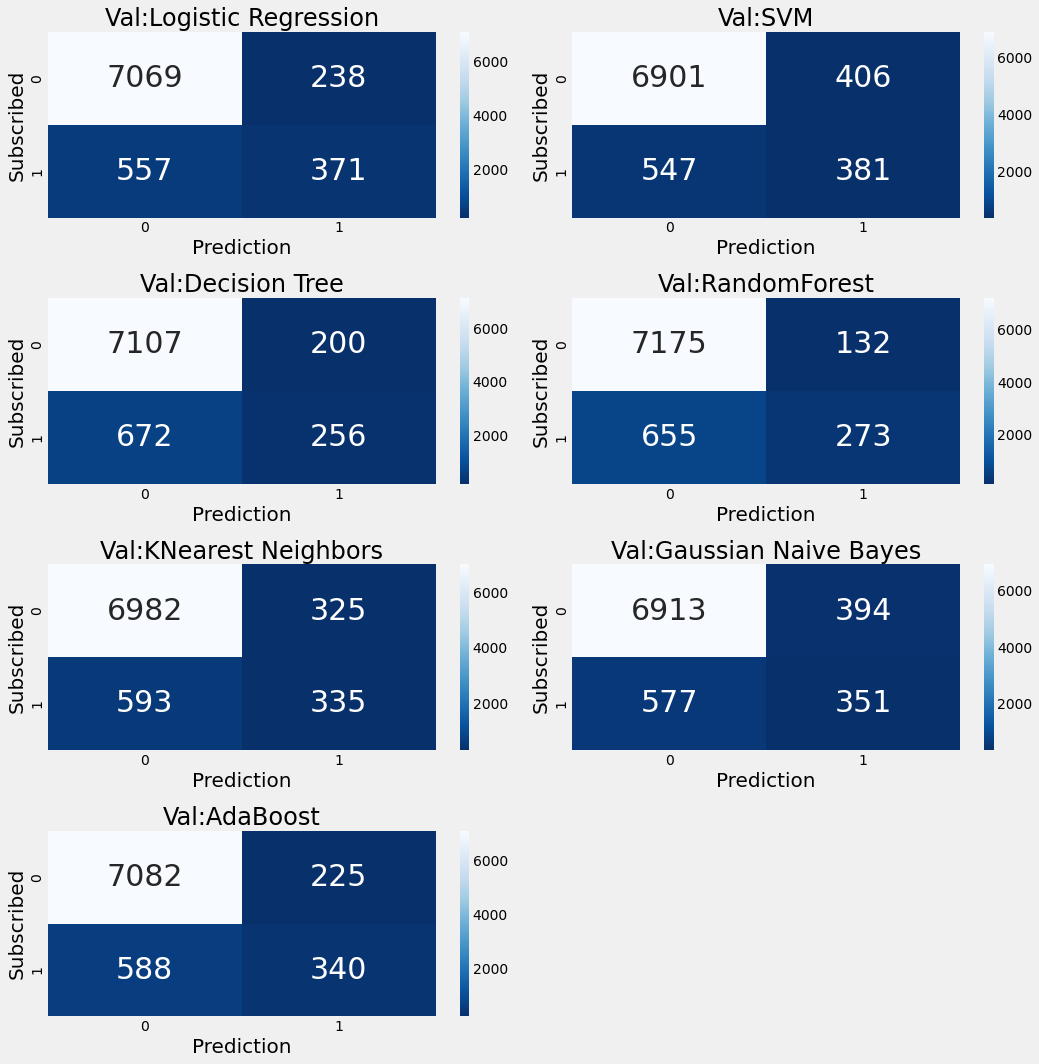

In [314]:
# plot all numerical features
plt.figure(figsize = (15, 15))
for i in range(len(models_name)):
    plt.subplot(len(models_name)//2+1, 2, i + 1)
    sns.heatmap(
        confusion_m_val[i],
        annot = True,
        fmt = '.0f',
        cmap = 'Blues_r',
        annot_kws={"fontsize":30}
    )
    plt.xlabel("Prediction", fontsize = 20)
    plt.ylabel("Subscribed", fontsize = 20)
    plt.title("Val:" + str(models_name[i]), fontsize = 24)
plt.tight_layout()
plt.show()

Random Forest memiliki nilai True Postive paling banyak dibandingkan model lainnya.

### Classification Report

In [315]:
for i in range(len(models_name)):
    print(models_name[i])
    print(c_report_val[i])

Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7307
           1       0.61      0.40      0.48       928

    accuracy                           0.90      8235
   macro avg       0.77      0.68      0.71      8235
weighted avg       0.89      0.90      0.89      8235

SVM
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7307
           1       0.48      0.41      0.44       928

    accuracy                           0.88      8235
   macro avg       0.71      0.68      0.69      8235
weighted avg       0.88      0.88      0.88      8235

Decision Tree
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7307
           1       0.56      0.28      0.37       928

    accuracy                           0.89      8235
   macro avg       0.74      0.62      0.66      8235
weighted avg       0.87      0.89   

Kita dapat melihat bahwa semua model dapat menmberikan sekitar 90% dari nilai aktual kelas 0, tetapi masih kurang pada kelas 1.

# Model Inference

In [316]:
best_model = models_dict["RandomForest"]

In [317]:
print(X.shape)
X.head(3)

(41176, 29)


,age,education,duration,campaign,previous,emp_var_rate,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,56,1,261,1,0,1.1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
1,57,4,149,1,0,1.1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0
2,37,4,226,1,0,1.1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [318]:
predict_this = [[20, 6, 400, 20, 0, -1.1, 0, 0, 0, 0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0.5,-0.866025,0.0,1.0]]

In [319]:
predict_val = scaling_pipeline.transform(predict_this)

C:\Users\Luthfi Fadhlillah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [320]:
if best_model.predict(predict_val) == 1:
    print("Orang ini kemungkinan besar akan berlangganan deposito berjangka.")
else:
    print("Orang ini kemungkinan besar TIDAK akan berlangganan deposito berjangka.")

Orang ini kemungkinan besar akan berlangganan deposito berjangka.


In [321]:
if best_model.predict(predict_val) == 0:
    print("Orang ini kemungkinan besar akan berlangganan deposito berjangka.")
else:
    print("Orang ini kemungkinan besar TIDAK akan berlangganan deposito berjangka.")

Orang ini kemungkinan besar TIDAK akan berlangganan deposito berjangka.


## Test Set

In [322]:
# predict y_test
RF_pred = best_model.predict(X_test_trf)

In [323]:
prediction_RF = pd.DataFrame({
    "Fact": y_test,
    "Prediction": RF_pred
})
prediction_RF

,Fact,Prediction
26635,0,0
24504,0,0
37882,0,0
37512,0,0
17776,0,0
...,...,...
33414,0,0
10421,0,0
17857,1,0
33219,1,1


In [324]:
prediction_RF.groupby(["Fact"]).count().rename(columns={"Prediction":"Count"}).T

Fact,0,1
Count,3654,464


In [325]:
prediction_RF.groupby(["Prediction"]).count().rename(columns={"fact":"Count"}).T

Prediction,0,1
Fact,3936,182


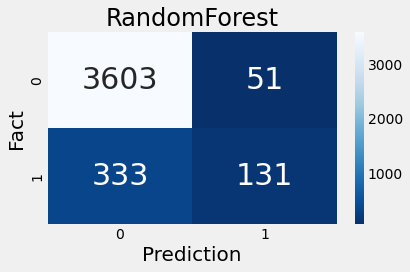

In [332]:
sns.heatmap(
    confusion_matrix(y_test, RF_pred),
    annot = True,
    fmt = '.0f',
    cmap = 'Blues_r',
    annot_kws={"fontsize":30}
)
plt.xlabel("Prediction", fontsize = 20)
plt.ylabel("Fact", fontsize = 20)
plt.title(str(models_name[3]), fontsize = 24)
plt.tight_layout()
plt.show()

In [327]:
scores_test_RF = best_model.predict_proba(X_test_trf)

In [328]:
fpr, tpr, threshold = roc_curve(y_test, scores_test_RF[:, 1])

In [329]:
roc_auc_test = roc_auc_score(y_test, RF_pred)

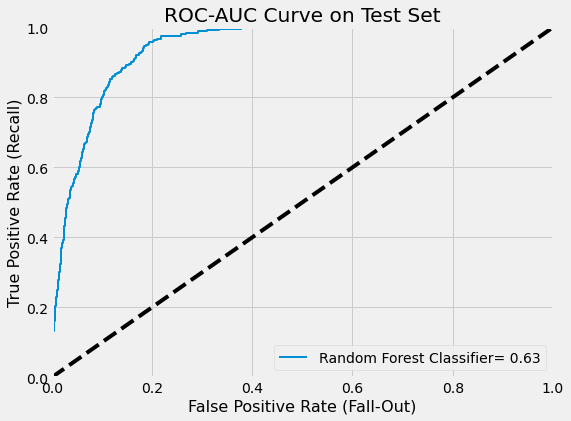

In [330]:
plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr, label="Random Forest Classifier= " + str(round(roc_auc_test,2)))
plt.title("ROC-AUC Curve on Test Set")
plt.legend()
plt.show()

In [331]:
print(classification_report(y_test, RF_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      3654
           1       0.72      0.28      0.41       464

    accuracy                           0.91      4118
   macro avg       0.82      0.63      0.68      4118
weighted avg       0.89      0.91      0.89      4118



# Conclusion

## Insights dari EDA

**Skewness:**
- cons_price_idx dan cons_conf_idx terdistribusi simetris.
- age, euribor3m, emp_var_rate dan nr_employed adalah moderately skewed.
- duration, campaign, previous, dan pdays adalah highly skewed.


Fitur yang mengandung outlier:

Upper limits:
- age, duration, campaign, dan previous.

Bottom limits:
- pdays

Berdasarkan kelompok usia, sebagian besar 30-an tahun cenderung berlangganan deposit daripada kelompok usia lainnya

Pada kelompok status perkawinan/marrital status pasangan suami istri cenderung berlangganan term dibandingkan dengan status single dan divorced.

admin, technician, dan blue-collar cenderung berlangganan term deposit. Namun menurut saya fitur ini tidak terlalu berpengaruh pada variabel prediksi. Jadi saya akan mendropnya.

- Pelanggan yang berlangganan dan tidak berlangganan memiliki median usia 37-38 tahun.
- Pelanggan yang berlangganan memiliki durasi yang lebih lama pada saat terakhir dihubungi oleh bank yaitu sekitar 449 detik atau 7,5 menit. Pelanggan yang tidak berlangganan memiliki durasi yang lebih rendah yaitu 164 detik atau 2,7 menit. Hal ini sesuai dengan deskripsi dataset variabel duration dimana mereka yang memiliki durasi 0 tidak berlangganan term deposit.

- Pelanggan yang berlangganan dan tidak berlangganan memiliki median jumlah kontak yang sama yang dilakukan selama campaign ini. Tetapi kita juga dapat menyimpulkan bahwa jumlah maksimum kontak yang dilakukan untuk pelanggan yang akhirnya berlangganan lebih rendah yaitu 23 berbanding 56.

- Fitur `pdays` adalah jumlah hari yang berlalu setelah klien terakhir dihubungi dari campaign sebelumnya. Seperti yang dinyatakan dalam deskripsi dataset, fitur ini memiliki nilai yang sangat tinggi pada rentang nilai positif (999) yang menunjukkan bahwa klien tidak pernah dihubungi sebelumnya. Hal ini mempengaruhi seluruh distribusi, kita tidak dapat melihat median sebenarnya bagi mereka yang telah dihubungi yang akhirnya berlangganan/tidak berlangganan.

Ada korelasi tinggi antara beberapa fitur:

- euribor3m - emp_var_rate (97%)

- nr_employed - emp_var_rate (91%)

- nr_employed - euribor3m (95%)
---
- Mayoritas orang memiliki nonexistent outcomes dari campaign pemasaran sebelumnya (poutcome), tidak ada pinjaman pribadi (loan), tidak ada kredit default.
- Mayoritas orang memiliki pekerjaan sebagai admin, blue-collar, dan technician.
- Mayoritas orang memiliki gelar sarjana.
- Mayoritas orang sudah menikah/married.
- Mayoritas orang tidak memiliki kredit default.
- Mayoritas orang memiliki housing loan.
- Mayoritas orang tidak memiliki pinjaman pribadi/personal loan.
- Mayoritas orang memiliki cellular contacts.
- Mayoritas orang terakhir dihubungi pada bulan Mei.


- Untuk marital features, kita tahu bahwa orang yang statusnya **Unknown** memiliki rasio tertinggi, tetapi jika kita melihat jumlah total orang dalam grup ini, itu tidak signifikan karena kita hanya memiliki sebagian kecil orang yang termasuk dalam grup ini . Rasio tertinggi ke-2 adalah **single**.

- Mayoritas orang yang tidak memiliki default credit, memiliki rasio tertinggi dari orang-orang yang berlangganan deposito berjangka.
    - Sebuah default terjadi ketika peminjam tidak dapat melakukan pembayaran tepat waktu, melewatkan pembayaran, atau menghindari atau berhenti melakukan pembayaran bunga atau pokok hutang. Dengan demikian, masuk akal jika orang yang tidak dapat melakukan pembayaran tepat waktu tidak akan berlangganan deposito berjangka.

- Orang yang memiliki housing loan memiliki rasio yang lebih tinggi dari orang yang berlangganan.

- Rasio orang yang memiliki pinjaman/loan tampaknya sama, tetapi dari jumlah total orang dalam kelompok, mereka yang tidak memiliki pinjaman pribadi/personal loan memiliki jumlah orang yang berlangganan lebih tinggi.

- Mayoritas orang yang dihubungi melalui ponselnya lebih cenderung berlangganan.

- Orang yang dihubungi pada bulan Maret, Desember, September, dan Oktober tampaknya memiliki rasio yang lebih tinggi dari orang yang berlangganan deposito berjangka. Namun faktanya, saya menemukan bahwa jumlah orang yang dihubungi selama bulan-bulan tersebut sangat sedikit.

- Rasio antara each day of the week (satu-satunya hari kerja yang ada) semuanya sama. Fitur ini tidak akan memberikan kekuatan prediksi untuk model.


## Model Analysis

Model Terbaik: **Random Forest**

- Dari uji cross validation diketahui bahwa random forest memiliki nilai tertinggi pada cv=5.

- Berdasarkan skor AUC, Random Forest Classifier memiliki performa terbaik dibandingkan dengan algoritma lainnya.

- Kita juga tahu bahwa RF juga memiliki presisi tertinggi dibandingkan model lainnya. 

- SVM merupakan model yang membutuhkan waktu paling lama dibanding model lainnya berdasarkan Time Elapsed.


- Secara keseluruhan, Random Forest memiliki nilai UAC tertinggi kedua setelah KNN, namun KNN merupakan model yang paling lambat dibandingkan model lainnya.

- Random Forest memiliki skor terbesar kedua dari nilai F1 tetapi masih kalah dibanding KNN.
- Dalam hal presisi, Random Forest menjadi yang terbaik dibandingkan dengan model algorithma lainnya.
- KNN memiliki nilai Recall tertinggi, artinya model ini dapat menangkap lebih banyak aktual kelas 1.
- Time elapsed model dalam memprediksi nilai bervariasi. Logistic Regression adalah model tercepat, sedangkan KNN adalah model paling lambat.
- Random Forest memiliki nilai True Postive paling banyak dibandingkan model lainnya.


Untuk mencapai skor yang lebih besar pada AUC, dan juga meningkatkan recall dan presisi, kita dapat mencoba menggunakan metode encoding lain. Kita juga bisa mencoba mentransformasikan outlier.